# Correlation Analysis

In [1]:
from postgres_db_adapter import PostgresDbAdapter
import pandas as pd
import numpy as np

In [2]:
# get postgre port
db = PostgresDbAdapter(
    dbname='rem',
    user='abajrami',
    host='mercator.ffe.de',
    port=5432,
    # you can place your password here, set as an environmental variable or leave as None (then you are prompted)
)

In [4]:
exante_input = db.query(
        """select * 
        FROM p_indeed.t_co2_exante_input
        WHERE p_indeed.t_co2_exante_input.datetime_de >= '2021-01-01 00:00:00.000000 +00:00' AND
                p_indeed.t_co2_exante_input.datetime_de <= '2021-12-31 23:00:00.000000'""")
exante_input.head()

c:\Users\ABajrami\anaconda3\lib\site-packages\postgres_db_adapter\postgres_db_adapter.py:126: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, self.connection, params=kwargs)


epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  
0 2021-01-01 00:00:00+00:00  
1 2021-01-01 01:00:00+00:00  
2 2021-01-01 02:00:00+00:00  
3 2021-01-01 03:00:00+00:00  
4 2021-01-01 04:00:00+00:00

In [5]:
expost = db.query(
        """select * 
        FROM p_indeed.t_co2_expost
        WHERE p_indeed.t_co2_expost.datetime_de >= '2021-01-01 00:00:00.000000 +00:00' AND
                p_indeed.t_co2_expost.datetime_de <= '2021-12-31 23:00:00.000000;'""")
expost.head()

c:\Users\ABajrami\anaconda3\lib\site-packages\postgres_db_adapter\postgres_db_adapter.py:126: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql, self.connection, params=kwargs)


epoch_utc  emission_factor               datetime_de
0  1.609459e+09       584.946289 2021-01-01 00:00:00+00:00
1  1.609463e+09       594.096519 2021-01-01 01:00:00+00:00
2  1.609466e+09       606.615312 2021-01-01 02:00:00+00:00
3  1.609470e+09       610.849916 2021-01-01 03:00:00+00:00
4  1.609474e+09       619.394920 2021-01-01 04:00:00+00:00

In [6]:
expost

epoch_utc  emission_factor               datetime_de
0     1.609459e+09       584.946289 2021-01-01 00:00:00+00:00
1     1.609463e+09       594.096519 2021-01-01 01:00:00+00:00
2     1.609466e+09       606.615312 2021-01-01 02:00:00+00:00
3     1.609470e+09       610.849916 2021-01-01 03:00:00+00:00
4     1.609474e+09       619.394920 2021-01-01 04:00:00+00:00
...            ...              ...                       ...
8755  1.640977e+09       191.943417 2021-12-31 19:00:00+00:00
8756  1.640981e+09       202.143352 2021-12-31 20:00:00+00:00
8757  1.640984e+09       208.805877 2021-12-31 21:00:00+00:00
8758  1.640988e+09       212.585930 2021-12-31 22:00:00+00:00
8759  1.640992e+09       213.098621 2021-12-31 23:00:00+00:00

[8760 rows x 3 columns]

In [7]:
correlation = exante_input
correlation['emission_factor'] = expost['emission_factor']
correlation

epoch_utc    windon  windoff  solar      load  prices  \
0     1.609459e+09   3653.75   464.75    0.0  41599.25   48.19   
1     1.609463e+09   3218.00   426.00    0.0  40513.50   44.68   
2     1.609466e+09   2867.75   398.25    0.0  40148.00   42.92   
3     1.609470e+09   2617.00   377.00    0.0  39846.75   40.39   
4     1.609474e+09   2439.00   357.25    0.0  39191.75   40.20   
...            ...       ...      ...    ...       ...     ...   
8755  1.640977e+09  33821.50  6012.75    0.0  51603.00    0.18   
8756  1.640981e+09  32768.75  5877.75    0.0  49238.25    0.08   
8757  1.640984e+09  31248.25  5876.00    0.0  48120.50    5.10   
8758  1.640988e+09  30179.50  5728.00    0.0  45980.25    6.32   
8759  1.640992e+09  25602.75  5928.00    0.0  41989.50   50.05   

                   datetime_de  emission_factor  
0    2021-01-01 00:00:00+00:00       584.946289  
1    2021-01-01 01:00:00+00:00       594.096519  
2    2021-01-01 02:00:00+00:00       606.615312  
3    2021-01-01 03:00:00+00:00       610.849916  
4    2021-01-01 04:00:00+00:00       619.394920  
...                        ...              ...  
8755 2021-12-31 19:00:00+00:00       191.943417  
8756 2021-12-31 20:00:00+00:00       202.143352  
8757 2021-12-31 21:00:00+00:00       208.805877  
8758 2021-12-31 22:00:00+00:00       212.585930  
8759 2021-12-31 23:00:00+00:00       213.098621  

[8760 rows x 8 columns]

## 2. get generation forecast

In [8]:
Generation_fc = pd.read_csv('Generation Forecast - Day ahead_generation_utc.csv')
#Generation_fc_adjusted = Generation_fc.drop(labels = 8760, axis = 0)
Generation_fc

MTU  \
0     01.01.2021 00:00 - 01.01.2021 01:00 (UTC)   
1     01.01.2021 01:00 - 01.01.2021 02:00 (UTC)   
2     01.01.2021 02:00 - 01.01.2021 03:00 (UTC)   
3     01.01.2021 03:00 - 01.01.2021 04:00 (UTC)   
4     01.01.2021 04:00 - 01.01.2021 05:00 (UTC)   
...                                         ...   
8755  31.12.2021 19:00 - 31.12.2021 20:00 (UTC)   
8756  31.12.2021 20:00 - 31.12.2021 21:00 (UTC)   
8757  31.12.2021 21:00 - 31.12.2021 22:00 (UTC)   
8758  31.12.2021 22:00 - 31.12.2021 23:00 (UTC)   
8759  31.12.2021 23:00 - 01.01.2022 00:00 (UTC)   

      Scheduled Generation [MW] (D) - Germany (DE)  \
0                                            43265   
1                                            42286   
2                                            41435   
3                                            40897   
4                                            42522   
...                                            ...   
8755                                         74078   
8756                                         69604   
8757                                         67109   
8758                                         63704   
8759                                         56890   

      Scheduled Consumption [MW] (D) - Germany (DE)  
0                                               NaN  
1                                               NaN  
2                                               NaN  
3                                               NaN  
4                                               NaN  
...                                             ...  
8755                                            NaN  
8756                                            NaN  
8757                                            NaN  
8758                                            NaN  
8759                                            NaN  

[8760 rows x 3 columns]

In [9]:
correlation['generation_forecast_aggregated'] = Generation_fc['Scheduled Generation [MW] (D) - Germany (DE)']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  
0 2021-01-01 00:00:00+00:00       584.946289                           43265  
1 2021-01-01 01:00:00+00:00       594.096519                           42286  
2 2021-01-01 02:00:00+00:00       606.615312                           41435  
3 2021-01-01 03:00:00+00:00       610.849916                           40897  
4 2021-01-01 04:00:00+00:00       619.394920                           42522

## 3. get weather data

In [10]:
Germany_2021 = pd.read_csv('DE_2021.csv')
Germany_2021.head()

datetime                        created_at  \
0  2021-01-01 00:00:00+00:00  2022-02-04T16:55:11.373028+00:00   
1  2021-01-01 01:00:00+00:00  2022-02-04T16:49:58.284222+00:00   
2  2021-01-01 02:00:00+00:00  2022-02-04T16:49:58.102721+00:00   
3  2021-01-01 03:00:00+00:00  2022-02-04T16:49:58.101622+00:00   
4  2021-01-01 04:00:00+00:00  2022-02-04T16:49:58.778849+00:00   

                         updated_at   timestamp zone_name  \
0  2022-05-05T04:30:19.892325+00:00  1609459200        DE   
1  2022-05-05T04:29:32.707800+00:00  1609462800        DE   
2  2022-05-05T04:33:13.941494+00:00  1609466400        DE   
3  2022-05-05T04:33:20.275036+00:00  1609470000        DE   
4  2022-05-05T04:29:32.707800+00:00  1609473600        DE   

   carbon_intensity_avg  carbon_intensity_direct_avg  \
0                399.14                       326.26   
1                403.49                       330.21   
2                410.76                       337.13   
3                411.12                       337.50   
4                419.15                       344.72   

   carbon_intensity_production_avg  carbon_intensity_discharge_avg  \
0                           422.72                          297.23   
1                           429.22                          297.23   
2                           437.14                             NaN   
3                           440.14                             NaN   
4                           445.90                             NaN   

   carbon_intensity_import_avg  ...  \
0                       248.13  ...   
1                       236.19  ...   
2                       242.25  ...   
3                       237.18  ...   
4                       247.18  ...   

   latest_forecasted_power_net_import_DK-DK2_avg  \
0                                          462.0   
1                                          705.0   
2                                          719.0   
3                                          720.0   
4                                          718.0   

   latest_forecasted_power_net_import_FR_avg  \
0                                    -2295.0   
1                                    -3251.0   
2                                    -1753.0   
3                                     -218.0   
4                                    -1383.0   

   latest_forecasted_power_net_import_LU_avg  \
0                                     -354.0   
1                                     -348.0   
2                                     -347.0   
3                                     -348.0   
4                                     -352.0   

   latest_forecasted_power_net_import_NL_avg  \
0                                    -2066.0   
1                                    -1958.0   
2                                    -2012.0   
3                                    -1940.0   
4                                    -2275.0   

   latest_forecasted_power_net_import_NO-NO2_avg  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   latest_forecasted_power_net_import_PL_avg  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

  latest_forecasted_power_net_import_SE_avg  \
0                                     615.0   
1                                     615.0   
2                                     615.0   
3                                     615.0   
4                                     615.0   

   latest_forecasted_power_net_import_SE-SE4_avg  \
0                                          615.0   
1                                          615.0   
2                                         

In [11]:
Weather_ger_21 = Germany_2021[['latest_forecasted_precipitation_avg','latest_forecasted_dewpoint_avg','latest_forecasted_temperature_avg','latest_forecasted_solar_avg','latest_forecasted_wind_y_avg','latest_forecasted_wind_x_avg']]
Weather_ger_21.head()

latest_forecasted_precipitation_avg  latest_forecasted_dewpoint_avg  \
0                                 0.57                          272.75   
1                                 0.05                          272.62   
2                                 0.11                          272.53   
3                                 0.17                          272.58   
4                                 0.20                          272.49   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  \
0                             274.25                          0.0   
1                             274.12                          0.0   
2                             274.03                          0.0   
3                             274.06                          0.0   
4                             273.98                          0.0   

   latest_forecasted_wind_y_avg  latest_forecasted_wind_x_avg  
0                          1.19                          0.62  
1                          1.12                          0.66  
2                          1.02                          0.77  
3                          0.89                          0.80  
4                          0.89                          1.00

In [12]:
correlation[['latest_forecasted_precipitation_avg','latest_forecasted_dewpoint_avg','latest_forecasted_temperature_avg','latest_forecasted_solar_avg','latest_forecasted_wind_y_avg','latest_forecasted_wind_x_avg']] = Germany_2021[['latest_forecasted_precipitation_avg','latest_forecasted_dewpoint_avg','latest_forecasted_temperature_avg','latest_forecasted_solar_avg','latest_forecasted_wind_y_avg','latest_forecasted_wind_x_avg']]
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  latest_forecasted_dewpoint_avg  \
0                                 0.57                          272.75   
1                                 0.05                          272.62   
2                                 0.11                          272.53   
3                                 0.17                          272.58   
4                                 0.20                          272.49   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  \
0                             274.25                          0.0   
1                             274.12                          0.0   
2                             274.03                          0.0   
3                             274.06                          0.0   
4                             273.98                          0.0   

   latest_forecasted_wind_y_avg  latest_forecasted_wind_x_avg  
0                          1.19                          0.62  
1                          1.12                          0.66  
2                          1.02                          0.77  
3                          0.89                          0.80  
4                          0.89                          1.00

## 4. get imort/export data

### Austria

In [13]:
Austria_21 = pd.read_csv('Scheduled Commercial Exchanges_Austria_utc.csv')
#Austria_21_adjusted = Austria_21.drop(labels = 8760, axis = 0)
Austria_21.rename(columns = {'Austria (AT) > Germany (DE) Day Ahead [MW]':'import_AT_forecast'}, inplace = True)
Austria_21.rename(columns = {'Germany (DE) > Austria (AT) Day Ahead [MW]':'export_AT_forecast'}, inplace = True)
Austria_21
#print(f'df contains NaNs: {df.isna().any().any()}')ny.csv')


Time (UTC)  import_AT_forecast  \
0     01.01.2021 00:00 - 01.01.2021 01:00                   0   
1     01.01.2021 01:00 - 01.01.2021 02:00                   0   
2     01.01.2021 02:00 - 01.01.2021 03:00                   0   
3     01.01.2021 03:00 - 01.01.2021 04:00                   0   
4     01.01.2021 04:00 - 01.01.2021 05:00                   0   
...                                   ...                 ...   
8755  31.12.2021 19:00 - 31.12.2021 20:00                   0   
8756  31.12.2021 20:00 - 31.12.2021 21:00                   0   
8757  31.12.2021 21:00 - 31.12.2021 22:00                   0   
8758  31.12.2021 22:00 - 31.12.2021 23:00                   0   
8759  31.12.2021 23:00 - 01.01.2022 00:00                   0   

      Austria (AT) > Germany (DE) Total [MW]  export_AT_forecast  \
0                                        143                1228   
1                                        433                1352   
2                                        333                1117   
3                                        411                1592   
4                                        512                1493   
...                                      ...                 ...   
8755                                      12                4136   
8756                                      22                3721   
8757                                      14                3738   
8758                                     227                3470   
8759                                      53                 930   

      Germany (DE) > Austria (AT) Total [MW]  
0                                       1228  
1                                       1352  
2                                       1123  
3                                       1592  
4                                       1493  
...                                      ...  
8755                                    4149  
8756                                    3743  
8757                                    3749  
8758                                    3492  
8759                                     932  

[8760 rows x 5 columns]

In [14]:
correlation['import_AT_forecast'] = Austria_21['import_AT_forecast']
correlation['export_AT_forecast'] = Austria_21['export_AT_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  latest_forecasted_dewpoint_avg  \
0                                 0.57                          272.75   
1                                 0.05                          272.62   
2                                 0.11                          272.53   
3                                 0.17                          272.58   
4                                 0.20                          272.49   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  \
0                             274.25                          0.0   
1                             274.12                          0.0   
2                             274.03                          0.0   
3                             274.06                          0.0   
4                             273.98                          0.0   

   latest_forecasted_wind_y_avg  latest_forecasted_wind_x_avg  \
0                          1.19                          0.62   
1                          1.12                          0.66   
2                          1.02                          0.77   
3                          0.89                          0.80   
4                          0.89                          1.00   

   import_AT_forecast  export_AT_forecast  
0                   0                1228  
1                   0                1352  
2                   0                1117  
3                   0                1592  
4                   0                1493

### Belgium

In [15]:
#Belgium_21 = pd.read_csv('Scheduled Commercial Exchanges_Belgium_utc_2.csv')
#Belgium_21_adj = Belgium_21.drop(labels = 8760, axis = 0)
#Belgium_21.rename(columns = {'Belgium (BE) > Germany (DE) Day Ahead [MW]':'import_BE_forecast'}, inplace = True)
#Belgium_21.rename(columns = {'Germany (DE) > Belgium (BE) Day Ahead [MW]':'export_BE_forecast'}, inplace = True)
#Belgium_21['Time (UTC)'] = pd.to_datetime(Belgium_21['Time (UTC)'])
#Belgium_21.resample('H', on = 'Time', closesd = 'right').mean.reset_index()

In [16]:
from entsoe import EntsoePandasClient
API_Key = 'c5d84e7f-b13a-4d79-8cd2-9f920a705c46'
client = EntsoePandasClient(api_key=API_Key)
country_code = 'DE'
emission_start_timestamp = correlation['datetime_de'].iloc[0]
print('start:', emission_start_timestamp)
emission_end_timestamp = correlation['datetime_de'].iloc[-1] 
BE_end = emission_end_timestamp + pd.DateOffset(hours = 1)
print('end:', BE_end)
from_BE = 'BE'
from_DE = 'DE'
to_BE = 'BE'
to_DE = 'DE'
BE_import = client.query_scheduled_exchanges(country_code_from = from_BE, country_code_to = to_DE, start = emission_start_timestamp, end = BE_end, dayahead = True)
BE_import

start: 2021-01-01 00:00:00+00:00
end: 2022-01-01 00:00:00+00:00


2021-01-01 01:00:00+01:00    0.0
2021-01-01 01:15:00+01:00    0.0
2021-01-01 01:30:00+01:00    0.0
2021-01-01 01:45:00+01:00    0.0
2021-01-01 02:00:00+01:00    0.0
                            ... 
2022-01-01 00:00:00+01:00    0.0
2022-01-01 00:15:00+01:00    0.0
2022-01-01 00:30:00+01:00    0.0
2022-01-01 00:45:00+01:00    0.0
2022-01-01 01:00:00+01:00    0.0
Freq: 15T, Length: 35041, dtype: float64

In [17]:
BE_import_test = BE_import.resample('1H', closed = 'left').mean()
#BE_import_test.drop(index = 8761)
BE_import_test

2021-01-01 01:00:00+01:00     0.0
2021-01-01 02:00:00+01:00     0.0
2021-01-01 03:00:00+01:00     0.0
2021-01-01 04:00:00+01:00     0.0
2021-01-01 05:00:00+01:00     0.0
                             ... 
2021-12-31 21:00:00+01:00     0.0
2021-12-31 22:00:00+01:00    41.0
2021-12-31 23:00:00+01:00     0.0
2022-01-01 00:00:00+01:00     0.0
2022-01-01 01:00:00+01:00     0.0
Freq: H, Length: 8761, dtype: float64

In [18]:
BE_import_test.index = BE_import_test.index.tz_convert('UTC')
BE_import_df = pd.DataFrame([BE_import_test]).T
BE_import_df = BE_import_df.drop(labels = '2022-01-01 00:00:00+00:00', axis = 0)
BE_import_df

0
2021-01-01 00:00:00+00:00   0.0
2021-01-01 01:00:00+00:00   0.0
2021-01-01 02:00:00+00:00   0.0
2021-01-01 03:00:00+00:00   0.0
2021-01-01 04:00:00+00:00   0.0
...                         ...
2021-12-31 19:00:00+00:00   0.0
2021-12-31 20:00:00+00:00   0.0
2021-12-31 21:00:00+00:00  41.0
2021-12-31 22:00:00+00:00   0.0
2021-12-31 23:00:00+00:00   0.0

[8760 rows x 1 columns]

In [19]:
BE_export = client.query_scheduled_exchanges(country_code_from = from_DE, country_code_to = to_BE, start = emission_start_timestamp, end = BE_end, dayahead = True)
BE_export

2021-01-01 01:00:00+01:00    832.0
2021-01-01 01:15:00+01:00    832.0
2021-01-01 01:30:00+01:00    832.0
2021-01-01 01:45:00+01:00    832.0
2021-01-01 02:00:00+01:00    808.0
                             ...  
2022-01-01 00:00:00+01:00    946.0
2022-01-01 00:15:00+01:00    946.0
2022-01-01 00:30:00+01:00    946.0
2022-01-01 00:45:00+01:00    946.0
2022-01-01 01:00:00+01:00    598.0
Freq: 15T, Length: 35041, dtype: float64

In [20]:
BE_export_test = BE_export.resample('1H', closed = 'left').mean()
BE_export_test

2021-01-01 01:00:00+01:00    832.0
2021-01-01 02:00:00+01:00    808.0
2021-01-01 03:00:00+01:00    615.0
2021-01-01 04:00:00+01:00    343.0
2021-01-01 05:00:00+01:00    470.0
                             ...  
2021-12-31 21:00:00+01:00    296.0
2021-12-31 22:00:00+01:00      0.0
2021-12-31 23:00:00+01:00    215.0
2022-01-01 00:00:00+01:00    946.0
2022-01-01 01:00:00+01:00    598.0
Freq: H, Length: 8761, dtype: float64

In [21]:
BE_export_test.index = BE_export_test.index.tz_convert('UTC')
BE_export_df = pd.DataFrame([BE_export_test]).T
BE_export_df = BE_export_df.drop(labels = '2022-01-01 00:00:00+00:00', axis = 0)
BE_export_df

0
2021-01-01 00:00:00+00:00  832.0
2021-01-01 01:00:00+00:00  808.0
2021-01-01 02:00:00+00:00  615.0
2021-01-01 03:00:00+00:00  343.0
2021-01-01 04:00:00+00:00  470.0
...                          ...
2021-12-31 19:00:00+00:00  735.0
2021-12-31 20:00:00+00:00  296.0
2021-12-31 21:00:00+00:00    0.0
2021-12-31 22:00:00+00:00  215.0
2021-12-31 23:00:00+00:00  946.0

[8760 rows x 1 columns]

In [22]:
# get new colums in correlation
BE_import_df.index = correlation.index
BE_export_df.index = correlation.index
correlation['import_BE_forecast'] = BE_import_df
correlation['export_BE_forecast'] = BE_export_df
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  latest_forecasted_dewpoint_avg  \
0                                 0.57                          272.75   
1                                 0.05                          272.62   
2                                 0.11                          272.53   
3                                 0.17                          272.58   
4                                 0.20                          272.49   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  \
0                             274.25                          0.0   
1                             274.12                          0.0   
2                             274.03                          0.0   
3                             274.06                          0.0   
4                             273.98                          0.0   

   latest_forecasted_wind_y_avg  latest_forecasted_wind_x_avg  \
0                          1.19                          0.62   
1                          1.12                          0.66   
2                          1.02                          0.77   
3                          0.89                          0.80   
4                          0.89                          1.00   

   import_AT_forecast  export_AT_forecast  import_BE_forecast  \
0                   0                1228                 0.0   
1                   0                1352                 0.0   
2                   0                1117                 0.0   
3                   0                1592                 0.0   
4                   0                1493                 0.0   

   export_BE_forecast  
0               832.0  
1               808.0  
2               615.0  
3               343.0  
4               470.0

### Czech Republic

In [23]:
Czech_21 = pd.read_csv('Scheduled Commercial Exchanges_Czech_21_utc.csv')
#Czech_21_adj = Czech_21.drop(labels = 8760, axis = 0)
Czech_21.rename(columns = {'Czech Republic (CZ) > Germany (DE) Day Ahead [MW]':'import_CZ_forecast'}, inplace = True)
Czech_21.rename(columns = {'Germany (DE) > Czech Republic (CZ) Day Ahead [MW]':'export_CZ_forecast'}, inplace = True)
Czech_21

Time (UTC)  import_CZ_forecast  \
0     01.01.2021 00:00 - 01.01.2021 01:00                2300   
1     01.01.2021 01:00 - 01.01.2021 02:00                2299   
2     01.01.2021 02:00 - 01.01.2021 03:00                2300   
3     01.01.2021 03:00 - 01.01.2021 04:00                2300   
4     01.01.2021 04:00 - 01.01.2021 05:00                2300   
...                                   ...                 ...   
8755  31.12.2021 19:00 - 31.12.2021 20:00                   0   
8756  31.12.2021 20:00 - 31.12.2021 21:00                   0   
8757  31.12.2021 21:00 - 31.12.2021 22:00                   0   
8758  31.12.2021 22:00 - 31.12.2021 23:00                   0   
8759  31.12.2021 23:00 - 01.01.2022 00:00                  16   

      Czech Republic (CZ) > Germany (DE) Total [MW]  export_CZ_forecast  \
0                                              2300                   0   
1                                              2299                   0   
2                                              2300                   0   
3                                              2300                   0   
4                                              2300                   0   
...                                             ...                 ...   
8755                                             64                 400   
8756                                             21                 400   
8757                                            116                 400   
8758                                            561                 400   
8759                                             21                 200   

      Germany (DE) > Czech Republic (CZ) Total [MW]  
0                                                 2  
1                                                 0  
2                                                 0  
3                                                 0  
4                                                12  
...                                             ...  
8755                                            400  
8756                                            400  
8757                                            400  
8758                                            400  
8759                                            200  

[8760 rows x 5 columns]

In [24]:
# get new colums in correlation
correlation['import_CZ_forecast'] = Czech_21['import_CZ_forecast']
correlation['export_CZ_forecast'] = Czech_21['export_CZ_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  \
0                                 0.57  ...   
1                                 0.05  ...   
2                                 0.11  ...   
3                                 0.17  ...   
4                                 0.20  ...   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  \
0                             274.25                          0.0   
1                             274.12                          0.0   
2                             274.03                          0.0   
3                             274.06                          0.0   
4                             273.98                          0.0   

   latest_forecasted_wind_y_avg  latest_forecasted_wind_x_avg  \
0                          1.19                          0.62   
1                          1.12                          0.66   
2                          1.02                          0.77   
3                          0.89                          0.80   
4                          0.89                          1.00   

   import_AT_forecast  export_AT_forecast  import_BE_forecast  \
0                   0                1228                 0.0   
1                   0                1352                 0.0   
2                   0                1117                 0.0   
3                   0                1592                 0.0   
4                   0                1493                 0.0   

   export_BE_forecast  import_CZ_forecast  export_CZ_forecast  
0               832.0                2300                   0  
1               808.0                2299                   0  
2               615.0                2300                   0  
3               343.0                2300                   0  
4               470.0                2300                   0  

[5 rows x 21 columns]

### Denmark

In [25]:
Denmark_21 = pd.read_csv('Scheduled Commercial Exchanges_Denmark_utc.csv')
#Denmark_21 = Denmark_21.drop(labels = 8760, axis = 0)
Denmark_21.rename(columns = {'Denmark (DK) > Germany (DE) Day Ahead [MW]':'import_DK_forecast'}, inplace = True)
Denmark_21.rename(columns = {'Germany (DE) > Denmark (DK) Day Ahead [MW]':'export_DK_forecast'}, inplace = True)
Denmark_21.head()

Time (UTC)  import_DK_forecast  \
0  01.01.2021 00:00 - 01.01.2021 01:00                2699   
1  01.01.2021 01:00 - 01.01.2021 02:00                2656   
2  01.01.2021 02:00 - 01.01.2021 03:00                2407   
3  01.01.2021 03:00 - 01.01.2021 04:00                2457   
4  01.01.2021 04:00 - 01.01.2021 05:00                2571   

   Denmark (DK) > Germany (DE) Total [MW]  export_DK_forecast  \
0                                    2951                   0   
1                                    2657                   0   
2                                    2559                   0   
3                                    2478                   0   
4                                    2593                   0   

   Germany (DE) > Denmark (DK) Total [MW]  
0                                     193  
1                                      82  
2                                       3  
3                                      35  
4                                     148

In [26]:
# get new colums in correlation
correlation['import_DK_forecast'] = Denmark_21['import_DK_forecast']
correlation['export_DK_forecast'] = Denmark_21['export_DK_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  latest_forecasted_wind_y_avg  \
0                                 0.57  ...                          1.19   
1                                 0.05  ...                          1.12   
2                                 0.11  ...                          1.02   
3                                 0.17  ...                          0.89   
4                                 0.20  ...                          0.89   

   latest_forecasted_wind_x_avg  import_AT_forecast  export_AT_forecast  \
0                          0.62                   0                1228   
1                          0.66                   0                1352   
2                          0.77                   0                1117   
3                          0.80                   0                1592   
4                          1.00                   0                1493   

   import_BE_forecast  export_BE_forecast  import_CZ_forecast  \
0                 0.0               832.0                2300   
1                 0.0               808.0                2299   
2                 0.0               615.0                2300   
3                 0.0               343.0                2300   
4                 0.0               470.0                2300   

   export_CZ_forecast  import_DK_forecast  export_DK_forecast  
0                   0                2699                   0  
1                   0                2656                   0  
2                   0                2407                   0  
3                   0                2457                   0  
4                   0                2571                   0  

[5 rows x 23 columns]

### France

In [27]:
France_21 = pd.read_csv('Scheduled Commercial Exchanges_France_utc.csv')
#France_21 = France_21.drop(labels = 8760, axis = 0)
France_21.rename(columns = {'France (FR) > Germany (DE) Day Ahead [MW]':'import_FR_forecast'}, inplace = True)
France_21.rename(columns = {'Germany (DE) > France (FR) Day Ahead [MW]':'export_FR_forecast'}, inplace = True)
France_21.head()


Time (UTC)  import_FR_forecast  \
0  01.01.2021 00:00 - 01.01.2021 01:00                   0   
1  01.01.2021 01:00 - 01.01.2021 02:00                   0   
2  01.01.2021 02:00 - 01.01.2021 03:00                   0   
3  01.01.2021 03:00 - 01.01.2021 04:00                 163   
4  01.01.2021 04:00 - 01.01.2021 05:00                   0   

   France (FR) > Germany (DE) Total [MW]  export_FR_forecast  \
0                                    489                2726   
1                                    382                2741   
2                                     30                1458   
3                                    163                   0   
4                                      7                 584   

   Germany (DE) > France (FR) Total [MW]  
0                                   2784  
1                                   3633  
2                                   1783  
3                                    381  
4                                   1390

In [28]:
# get new colums in correlation
correlation['import_FR_forecast'] = France_21['import_FR_forecast']
correlation['export_FR_forecast'] = France_21['export_FR_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  import_AT_forecast  \
0                                 0.57  ...                   0   
1                                 0.05  ...                   0   
2                                 0.11  ...                   0   
3                                 0.17  ...                   0   
4                                 0.20  ...                   0   

   export_AT_forecast  import_BE_forecast  export_BE_forecast  \
0                1228                 0.0               832.0   
1                1352                 0.0               808.0   
2                1117                 0.0               615.0   
3                1592                 0.0               343.0   
4                1493                 0.0               470.0   

   import_CZ_forecast  export_CZ_forecast  import_DK_forecast  \
0                2300                   0                2699   
1                2299                   0                2656   
2                2300                   0                2407   
3                2300                   0                2457   
4                2300                   0                2571   

   export_DK_forecast  import_FR_forecast  export_FR_forecast  
0                   0                   0                2726  
1                   0                   0                2741  
2                   0                   0                1458  
3                   0                 163                   0  
4                   0                   0                 584  

[5 rows x 25 columns]

### Luxembourg

In [29]:
Luxembourg_21 = pd.read_csv('Scheduled Commercial Exchanges_Luxemburg_utc.csv')
#Luxembourg_21_adj = Luxembourg_21.drop(labels = 8760, axis = 0)
Luxembourg_21.rename(columns = {'Luxembourg (LU) > Germany (DE) Day Ahead [MW]':'import_LU_forecast'}, inplace = True)
Luxembourg_21.rename(columns = {'Germany (DE) > Luxembourg (LU) Day Ahead [MW]':'export_LU_forecast'}, inplace = True)
Luxembourg_21.head()


Time (UTC)  import_LU_forecast  \
0  01.01.2021 00:00 - 01.01.2021 01:00                   4   
1  01.01.2021 01:00 - 01.01.2021 02:00                   4   
2  01.01.2021 02:00 - 01.01.2021 03:00                   4   
3  01.01.2021 03:00 - 01.01.2021 04:00                   3   
4  01.01.2021 04:00 - 01.01.2021 05:00                   2   

   Luxembourg (LU) > Germany (DE) Total [MW]  export_LU_forecast  \
0                                          2                 356   
1                                          1                 349   
2                                          0                 346   
3                                          0                 347   
4                                          0                 350   

   Germany (DE) > Luxembourg (LU) Total [MW]  
0                                        356  
1                                        349  
2                                        347  
3                                        348  
4                                        352

In [30]:
# get new colums in correlation
correlation['import_LU_forecast'] = Luxembourg_21['import_LU_forecast']
correlation['export_LU_forecast'] = Luxembourg_21['export_LU_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  import_BE_forecast  \
0                                 0.57  ...                 0.0   
1                                 0.05  ...                 0.0   
2                                 0.11  ...                 0.0   
3                                 0.17  ...                 0.0   
4                                 0.20  ...                 0.0   

   export_BE_forecast  import_CZ_forecast  export_CZ_forecast  \
0               832.0                2300                   0   
1               808.0                2299                   0   
2               615.0                2300                   0   
3               343.0                2300                   0   
4               470.0                2300                   0   

   import_DK_forecast  export_DK_forecast  import_FR_forecast  \
0                2699                   0                   0   
1                2656                   0                   0   
2                2407                   0                   0   
3                2457                   0                 163   
4                2571                   0                   0   

   export_FR_forecast  import_LU_forecast  export_LU_forecast  
0                2726                   4                 356  
1                2741                   4                 349  
2                1458                   4                 346  
3                   0                   3                 347  
4                 584                   2                 350  

[5 rows x 27 columns]

### Netherlands

In [31]:
Netherlands_21 = pd.read_csv('Scheduled Commercial Exchanges_Netherlands_utc.csv')
#Netherlands_21 = Netherlands_21.drop(labels = 8760, axis = 0)
Netherlands_21.rename(columns = {'Netherlands (NL) > Germany (DE) Day Ahead [MW]':'import_NL_forecast'}, inplace = True)
Netherlands_21.rename(columns = {'Germany (DE) > Netherlands (NL) Day Ahead [MW]':'export_NL_forecast'}, inplace = True)
Netherlands_21.head()


Time (UTC)  import_NL_forecast  \
0  01.01.2021 00:00 - 01.01.2021 01:00                   0   
1  01.01.2021 01:00 - 01.01.2021 02:00                   0   
2  01.01.2021 02:00 - 01.01.2021 03:00                   0   
3  01.01.2021 03:00 - 01.01.2021 04:00                   0   
4  01.01.2021 04:00 - 01.01.2021 05:00                   0   

   Netherlands (NL) > Germany (DE) Total [MW]  export_NL_forecast  \
0                                           0                1692   
1                                          46                1938   
2                                           0                1984   
3                                          44                1801   
4                                           0                1965   

   Germany (DE) > Netherlands (NL) Total [MW]  
0                                        2066  
1                                        2004  
2                                        2012  
3                                        1984  
4                                        2275

In [32]:
# get new colums in correlation
correlation['import_NL_forecast'] = Netherlands_21['import_NL_forecast']
correlation['export_NL_forecast'] = Netherlands_21['export_NL_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  import_CZ_forecast  \
0                                 0.57  ...                2300   
1                                 0.05  ...                2299   
2                                 0.11  ...                2300   
3                                 0.17  ...                2300   
4                                 0.20  ...                2300   

   export_CZ_forecast  import_DK_forecast  export_DK_forecast  \
0                   0                2699                   0   
1                   0                2656                   0   
2                   0                2407                   0   
3                   0                2457                   0   
4                   0                2571                   0   

   import_FR_forecast  export_FR_forecast  import_LU_forecast  \
0                   0                2726                   4   
1                   0                2741                   4   
2                   0                1458                   4   
3                 163                   0                   3   
4                   0                 584                   2   

   export_LU_forecast  import_NL_forecast  export_NL_forecast  
0                 356                   0                1692  
1                 349                   0                1938  
2                 346                   0                1984  
3                 347                   0                1801  
4                 350                   0                1965  

[5 rows x 29 columns]

### Norway

In [117]:
Norway_21 = pd.read_csv('Scheduled Commercial Exchanges_Norway_utc.csv')
#Norway_21_adj = Norway_21.drop(labels = 8760, axis = 0)
Norway_21.rename(columns = {'Norway (NO) > Germany (DE) Day Ahead [MW]':'import_NO_forecast'}, inplace = True)
Norway_21.rename(columns = {'Germany (DE) > Norway (NO) Day Ahead [MW]':'export_NO_forecast'}, inplace = True)
Norway_21

Time (UTC)  import_NO_forecast  \
0     01.01.2021 00:00 - 01.01.2021 01:00                 700   
1     01.01.2021 01:00 - 01.01.2021 02:00                 700   
2     01.01.2021 02:00 - 01.01.2021 03:00                 700   
3     01.01.2021 03:00 - 01.01.2021 04:00                 700   
4     01.01.2021 04:00 - 01.01.2021 05:00                 700   
...                                   ...                 ...   
8755  31.12.2021 19:00 - 31.12.2021 20:00                   0   
8756  31.12.2021 20:00 - 31.12.2021 21:00                   0   
8757  31.12.2021 21:00 - 31.12.2021 22:00                   0   
8758  31.12.2021 22:00 - 31.12.2021 23:00                   0   
8759  31.12.2021 23:00 - 01.01.2022 00:00                   0   

      Norway (NO) > Germany (DE) Total [MW]  export_NO_forecast  \
0                                       700                   0   
1                                       700                   0   
2                                       700                   0   
3                                       700                   0   
4                                       700                   0   
...                                     ...                 ...   
8755                                      0                1399   
8756                                      0                1399   
8757                                      0                1399   
8758                                    280                1399   
8759                                      0                1361   

      Germany (DE) > Norway (NO) Total [MW]  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  
...                                     ...  
8755                                   1400  
8756                                   1400  
8757                                   1400  
8758                                   1680  
8759                                   1361  

[8760 rows x 5 columns]

In [198]:
# get new colums in correlation
correlation['import_NO_forecast'] = Norway_21['import_NO_forecast']
correlation['export_NO_forecast'] = Norway_21['export_NO_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  import_DK_forecast  \
0                                 0.57  ...                2699   
1                                 0.05  ...                2656   
2                                 0.11  ...                2407   
3                                 0.17  ...                2457   
4                                 0.20  ...                2571   

   export_DK_forecast  import_FR_forecast  export_FR_forecast  \
0                   0                   0                2726   
1                   0                   0                2741   
2                   0                   0                1458   
3                   0                 163                   0   
4                   0                   0                 584   

   import_LU_forecast  export_LU_forecast  import_NL_forecast  \
0                   4                 356                   0   
1                   4                 349                   0   
2                   4                 346                   0   
3                   3                 347                   0   
4                   2                 350                   0   

   export_NL_forecast  import_NO_forecast  export_NO_forecast  
0                1692                 700                   0  
1                1938                 700                   0  
2                1984                 700                   0  
3                1801                 700                   0  
4                1965                 700                   0  

[5 rows x 31 columns]

### Poland

In [33]:
Poland_21 = pd.read_csv('Scheduled Commercial Exchanges_Poland_utc.csv')
#Poland_21_adj = Poland_21.drop(labels = 8760, axis = 0)
Poland_21.rename(columns = {'Poland (PL) > Germany (DE) Day Ahead [MW]':'import_PL_forecast'}, inplace = True)
Poland_21.rename(columns = {'Germany (DE) > Poland (PL) Day Ahead [MW]':'export_PL_forecast'}, inplace = True)
Poland_21

Time (UTC)  import_PL_forecast  \
0     01.01.2021 00:00 - 01.01.2021 01:00                   0   
1     01.01.2021 01:00 - 01.01.2021 02:00                   0   
2     01.01.2021 02:00 - 01.01.2021 03:00                   0   
3     01.01.2021 03:00 - 01.01.2021 04:00                   0   
4     01.01.2021 04:00 - 01.01.2021 05:00                   0   
...                                   ...                 ...   
8755  31.12.2021 19:00 - 31.12.2021 20:00                   0   
8756  31.12.2021 20:00 - 31.12.2021 21:00                   0   
8757  31.12.2021 21:00 - 31.12.2021 22:00                   0   
8758  31.12.2021 22:00 - 31.12.2021 23:00                   0   
8759  31.12.2021 23:00 - 01.01.2022 00:00                 216   

      Poland (PL) > Germany (DE) Total [MW]  export_PL_forecast  \
0                                         0                   0   
1                                         1                   0   
2                                         0                   0   
3                                         0                   0   
4                                         0                   0   
...                                     ...                 ...   
8755                                     13                   0   
8756                                      0                   0   
8757                                      0                   0   
8758                                     40                   0   
8759                                    216                   0   

      Germany (DE) > Poland (PL) Total [MW]  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  
...                                     ...  
8755                                      0  
8756                                      0  
8757                                      0  
8758                                      0  
8759                                     87  

[8760 rows x 5 columns]

In [34]:
# get new colums in correlation
correlation['import_PL_forecast'] = Poland_21['import_PL_forecast']
correlation['export_PL_forecast'] = Poland_21['export_PL_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  import_DK_forecast  \
0                                 0.57  ...                2699   
1                                 0.05  ...                2656   
2                                 0.11  ...                2407   
3                                 0.17  ...                2457   
4                                 0.20  ...                2571   

   export_DK_forecast  import_FR_forecast  export_FR_forecast  \
0                   0                   0                2726   
1                   0                   0                2741   
2                   0                   0                1458   
3                   0                 163                   0   
4                   0                   0                 584   

   import_LU_forecast  export_LU_forecast  import_NL_forecast  \
0                   4                 356                   0   
1                   4                 349                   0   
2                   4                 346                   0   
3                   3                 347                   0   
4                   2                 350                   0   

   export_NL_forecast  import_PL_forecast  export_PL_forecast  
0                1692                   0                   0  
1                1938                   0                   0  
2                1984                   0                   0  
3                1801                   0                   0  
4                1965                   0                   0  

[5 rows x 31 columns]

### Sweden

In [35]:
## has only NE values

#Sweden_21 = pd.read_csv('Scheduled Commercial Exchanges_Sweden_21_01.csv')
#Sweden_21_adj = Sweden_21.drop(labels = 8760, axis = 0)
#Sweden_21_adj.rename(columns = {'Sweden (SE) > Germany (DE) Day Ahead [MW]':'import_SE_forecast'}, inplace = True)
#Sweden_21_adj.rename(columns = {'Germany (DE) > Sweden (SE) Day Ahead [MW]':'export_SE_forecast'}, inplace = True)
#Sweden_21_adj.replace('n/e', 0)
# get new colums in correlation
#correlation['import_SE_forecast'] = Sweden_21_adj['import_SE_forecast']
#correlation['export_SE_forecast'] = Sweden_21_adj['export_SE_forecast']
#correlation
#correlation.head()
#correlation['import_SE_forecast'].values

### Switzerland

In [36]:
Switzerland_21 = pd.read_csv('Scheduled Commercial Exchanges_Switzerland_utc.csv')
#Switzerland_21_adj = Switzerland_21.drop(labels = 8760, axis = 0)
Switzerland_21.rename(columns = {'Switzerland (CH) > Germany (DE) Day Ahead [MW]':'import_CH_forecast'}, inplace = True)
Switzerland_21.rename(columns = {'Germany (DE) > Switzerland (CH) Day Ahead [MW]':'export_CH_forecast'}, inplace = True)
Switzerland_21.head()


Time (UTC)  import_CH_forecast  \
0  01.01.2021 00:00 - 01.01.2021 01:00                 405   
1  01.01.2021 01:00 - 01.01.2021 02:00                 507   
2  01.01.2021 02:00 - 01.01.2021 03:00                 291   
3  01.01.2021 03:00 - 01.01.2021 04:00                 318   
4  01.01.2021 04:00 - 01.01.2021 05:00                 328   

   Switzerland (CH) > Germany (DE) Total [MW]  export_CH_forecast  \
0                                         405                1114   
1                                         524                1382   
2                                         347                1127   
3                                         326                1092   
4                                         336                1248   

   Germany (DE) > Switzerland (CH) Total [MW]  
0                                        1157  
1                                        1375  
2                                        1097  
3                                        1092  
4                                        1246

In [37]:
# get new colums in correlation
correlation['import_CH_forecast'] = Switzerland_21['import_CH_forecast']
correlation['export_CH_forecast'] = Switzerland_21['export_CH_forecast']
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  import_FR_forecast  \
0                                 0.57  ...                   0   
1                                 0.05  ...                   0   
2                                 0.11  ...                   0   
3                                 0.17  ...                 163   
4                                 0.20  ...                   0   

   export_FR_forecast  import_LU_forecast  export_LU_forecast  \
0                2726                   4                 356   
1                2741                   4                 349   
2                1458                   4                 346   
3                   0                   3                 347   
4                 584                   2                 350   

   import_NL_forecast  export_NL_forecast  import_PL_forecast  \
0                   0                1692                   0   
1                   0                1938                   0   
2                   0                1984                   0   
3                   0                1801                   0   
4                   0                1965                   0   

   export_PL_forecast  import_CH_forecast  export_CH_forecast  
0                   0                 405                1114  
1                   0                 507                1382  
2                   0                 291                1127  
3                   0                 318                1092  
4                   0                 328                1248  

[5 rows x 33 columns]

In [38]:
#drop Sweden because where is no forecast available
#correlation = correlation.drop(columns = ['import_SE_forecast','export_SE_forecast'])#
#correlation.head()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

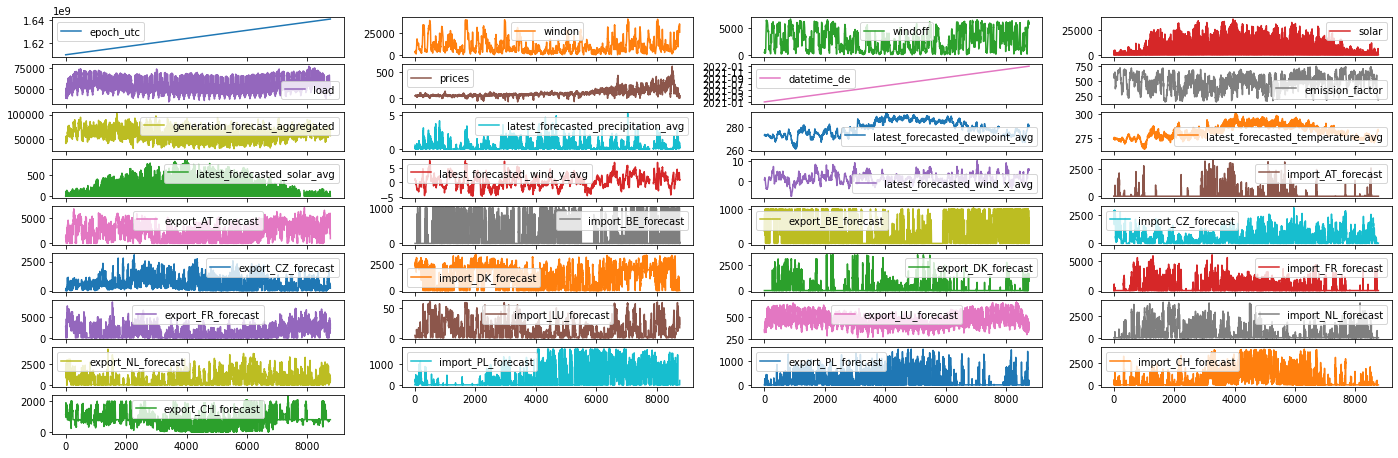

In [39]:
correlation.plot(subplots=True, layout=(14, 4), figsize=(24, 12))

In [40]:
correlation.columns

Index(['epoch_utc', 'windon', 'windoff', 'solar', 'load', 'prices',
       'datetime_de', 'emission_factor', 'generation_forecast_aggregated',
       'latest_forecasted_precipitation_avg', 'latest_forecasted_dewpoint_avg',
       'latest_forecasted_temperature_avg', 'latest_forecasted_solar_avg',
       'latest_forecasted_wind_y_avg', 'latest_forecasted_wind_x_avg',
       'import_AT_forecast', 'export_AT_forecast', 'import_BE_forecast',
       'export_BE_forecast', 'import_CZ_forecast', 'export_CZ_forecast',
       'import_DK_forecast', 'export_DK_forecast', 'import_FR_forecast',
       'export_FR_forecast', 'import_LU_forecast', 'export_LU_forecast',
       'import_NL_forecast', 'export_NL_forecast', 'import_PL_forecast',
       'export_PL_forecast', 'import_CH_forecast', 'export_CH_forecast'],
      dtype='object')

## 5. analyze co2 data

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### get co2 data from correlation

In [45]:
#co2_emission['datetime_de'] = correlation['datetime_de']
co2 = []
#co2.append(correlation['datetime_de'])
co2.append(correlation['emission_factor'])
co2_factor = pd.DataFrame(co2).T.set_index(correlation['datetime_de'])
co2_factor.head()

emission_factor
datetime_de                               
2021-01-01 00:00:00+00:00       584.946289
2021-01-01 01:00:00+00:00       594.096519
2021-01-01 02:00:00+00:00       606.615312
2021-01-01 03:00:00+00:00       610.849916
2021-01-01 04:00:00+00:00       619.394920

In [208]:
period = pd.infer_freq(co2_factor.values)
print(period)

None


### check stats

In [209]:
co2_factor.describe()

emission_factor
count      8760.000000
mean        481.006420
std         135.838254
min         156.020739
25%         385.850199
50%         497.112908
75%         588.572153
max         753.502874

<AxesSubplot:xlabel='datetime_de'>

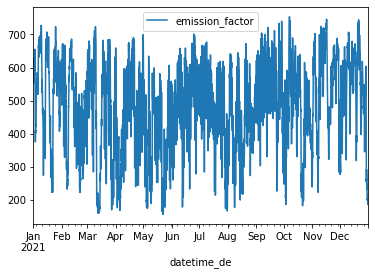

In [210]:
co2_factor.plot()

### check autocorrelation

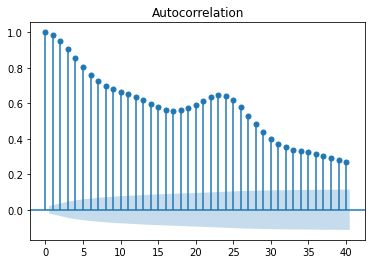

In [216]:
plot_acf(co2_factor)
plt.show()

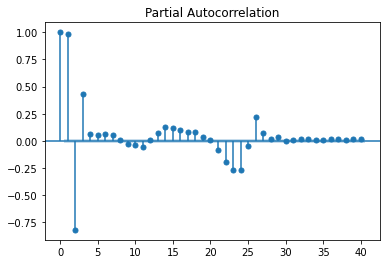

In [218]:
plot_pacf(co2_factor)
plt.show()

### check for stationarity

In [219]:
result = adfuller(co2_factor)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('Fail to reject Null - Hypothesis: time series is non-stationary')
else:
    print('Reject Null - Hypothesis: time series is stationary')

ADF Statistic: -8.903238
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Null - Hypothesis: time series is stationary


In [220]:
from numpy import log
co2_factor_log = log(co2_factor)
result = adfuller(co2_factor_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('Fail to reject Null - Hypothesis: time series is non-stationary')
else:
    print('Reject Null - Hypothesis: time series is stationary')
    

ADF Statistic: -8.393407
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Null - Hypothesis: time series is stationary


### check different components of co2 emission factor

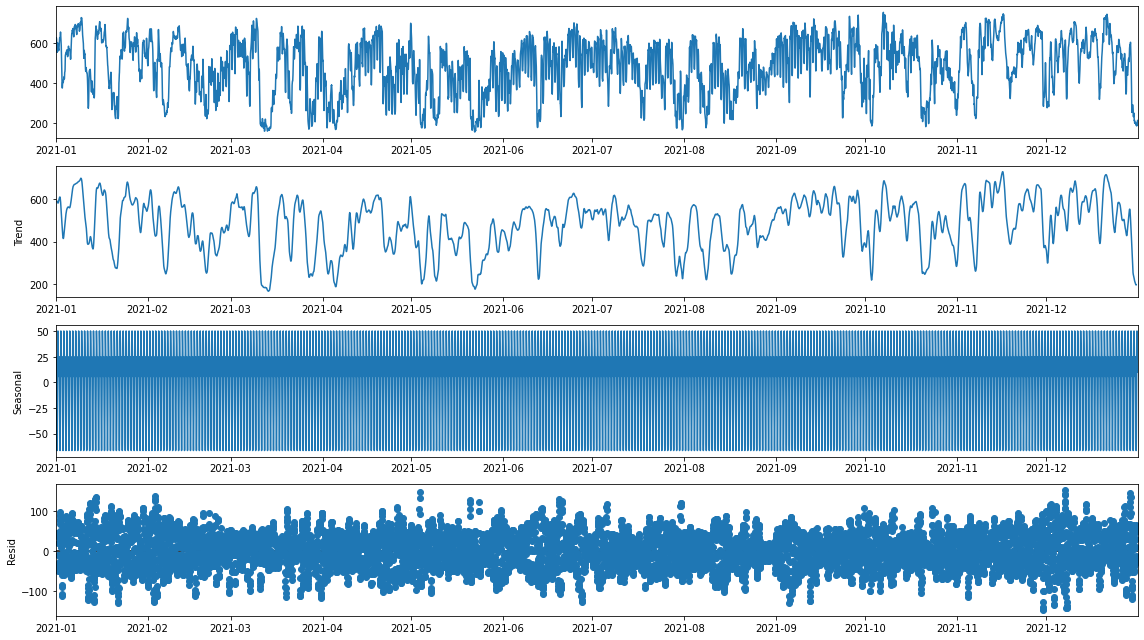

In [221]:
result = seasonal_decompose(co2_factor, model = 'additive')#, period = 1)
fig_co2 = result.plot()
fig_co2.set_size_inches((16, 9))
fig_co2.tight_layout()
plt.show()

(447074.0, 447170.0)

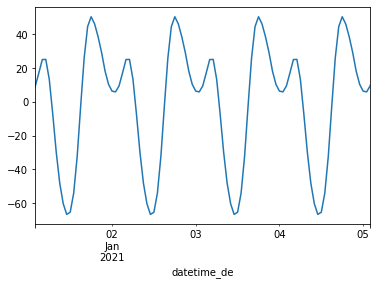

In [222]:
result.seasonal.plot()
plt.xlim('2021-01-01 02:00:00+00:00','2021-01-05 02:00:00+00:00')

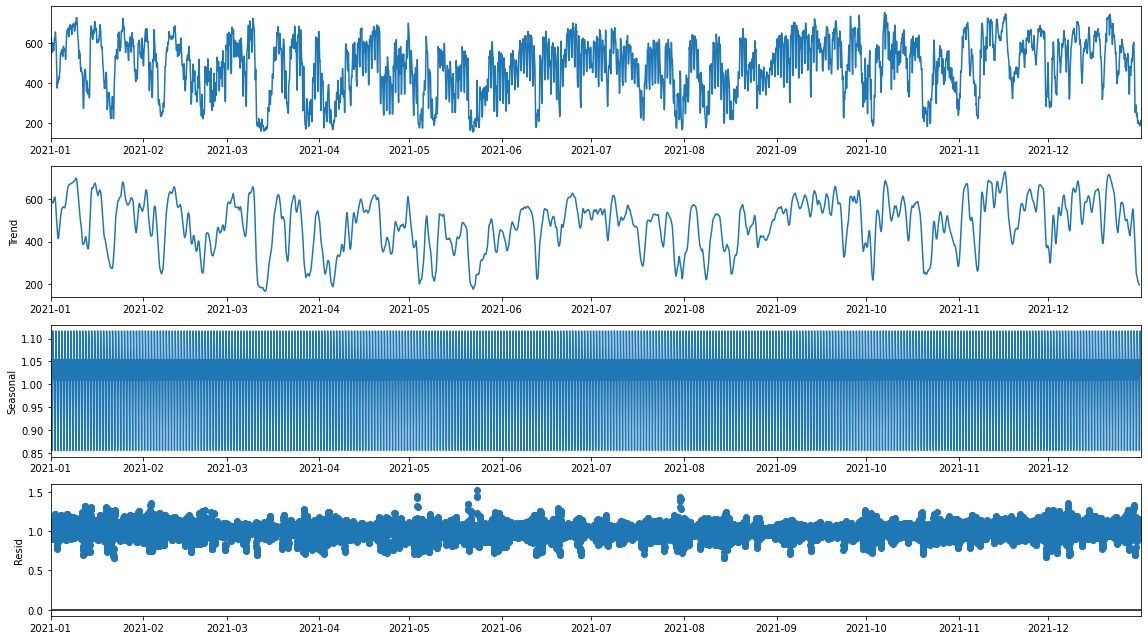

In [223]:
result = seasonal_decompose(co2_factor, model = 'multiplicative')
fig_co2 = result.plot()
fig_co2.set_size_inches((16, 9))
fig_co2.tight_layout()
plt.show()

(447074.0, 447170.0)

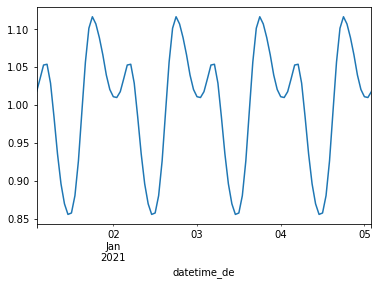

In [224]:
result.seasonal.plot()
plt.xlim('2021-01-01 02:00:00+00:00','2021-01-05 02:00:00+00:00')

### Do the same for CO2 factor of electrictitymap

In [225]:
co2_consumption = pd.DataFrame(Germany_2021['carbon_intensity_avg']).set_index(correlation['datetime_de'])
co2_consumption.head()

carbon_intensity_avg
datetime_de                                    
2021-01-01 00:00:00+00:00                399.14
2021-01-01 01:00:00+00:00                403.49
2021-01-01 02:00:00+00:00                410.76
2021-01-01 03:00:00+00:00                411.12
2021-01-01 04:00:00+00:00                419.15

In [226]:
co2_consumption.describe()

carbon_intensity_avg
count           8760.000000
mean             329.704412
std               90.528092
min              108.480000
25%              265.485000
50%              339.305000
75%              401.502500
max              513.140000

<AxesSubplot:xlabel='datetime_de'>

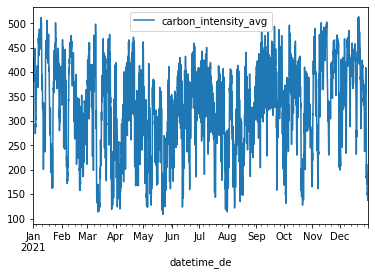

In [227]:
co2_consumption.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

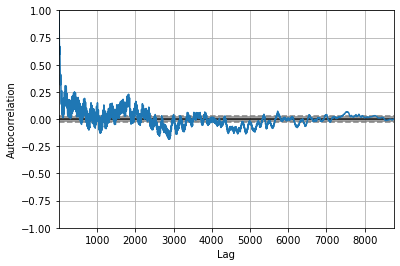

In [228]:
autocorrelation_plot(co2_consumption)

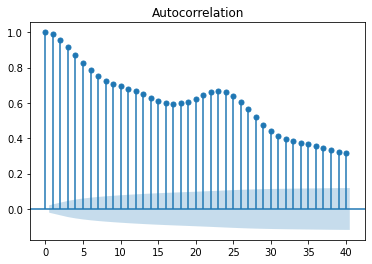

In [230]:
plot_acf(co2_consumption)
plt.show()

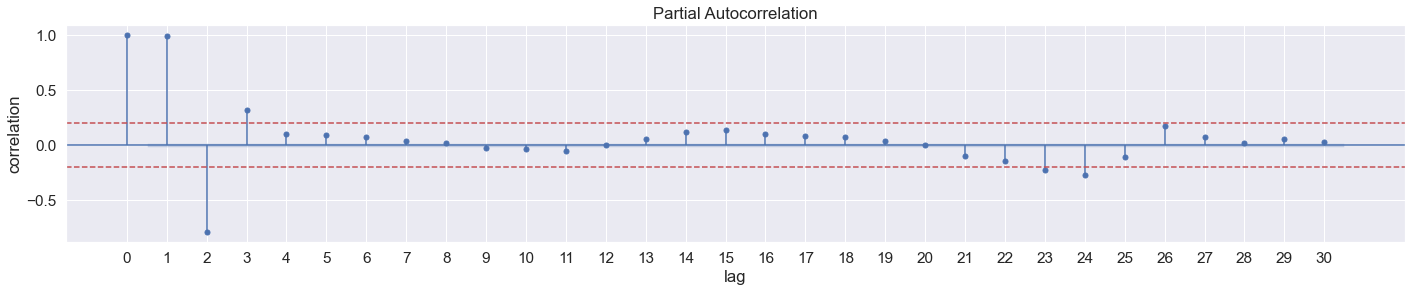

In [292]:
plot_pacf(co2_consumption, lags = 30)
plt.xlabel('lag')
plt.ylabel('correlation')
plt.xticks(np.arange(0,31,1.0))
plt.rcParams['figure.figsize'] = (24,4)
plt.axhline(y = 0.2, color = 'r', linestyle = '--')
plt.axhline(y = -0.2, color = 'r', linestyle = '--')
plt.show()

In [229]:
result = adfuller(co2_consumption)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('Fail to reject Null - Hypothesis: time series is non-stationary')
else:
    print('Reject Null - Hypothesis: time series is stationary')

ADF Statistic: -8.428368
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Null - Hypothesis: time series is stationary


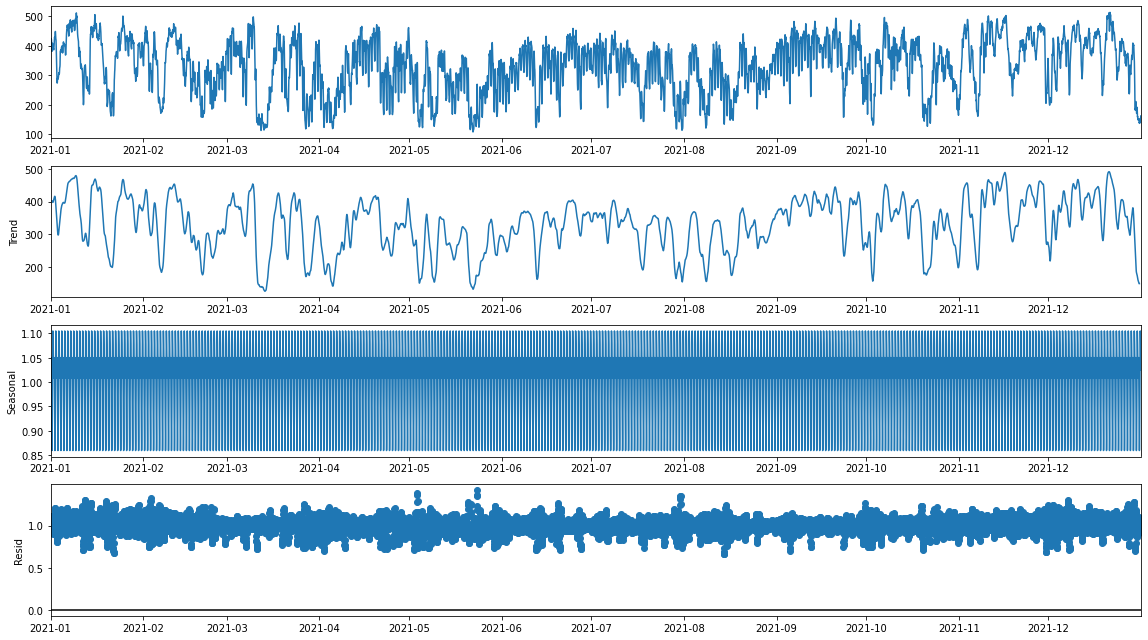

In [232]:
result2 = seasonal_decompose(co2_consumption, model = 'multiplicative')
#plt.figure(figsize=(40,20))
fig_co2_cons = result2.plot()
fig_co2_cons.set_size_inches((16, 9))
fig_co2_cons.tight_layout()
plt.show()

(447074.0, 447170.0)

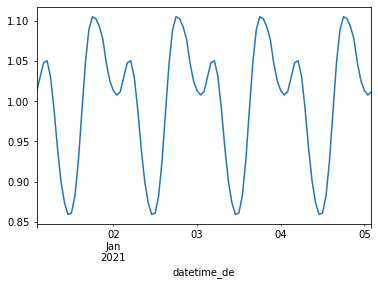

In [233]:
result2.seasonal.plot()
plt.xlim('2021-01-01 02:00:00+00:00','2021-01-05 02:00:00+00:00')

In [234]:
expost_long = db.query(
        """select * 
        FROM p_indeed.t_co2_expost;""")
expost_long.head()

C:\Users\ABajrami\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


epoch_utc  emission_factor               datetime_de
0  1.546297e+09       298.240217 2018-12-31 23:00:00+00:00
1  1.546301e+09       266.522473 2019-01-01 00:00:00+00:00
2  1.546304e+09       262.594215 2019-01-01 01:00:00+00:00
3  1.546308e+09       260.190772 2019-01-01 02:00:00+00:00
4  1.546312e+09       250.496683 2019-01-01 03:00:00+00:00

In [235]:
co2_factor_long = pd.DataFrame(expost_long['emission_factor']).set_index(expost_long['datetime_de'])
co2_factor_long.head()

emission_factor
datetime_de                               
2018-12-31 23:00:00+00:00       298.240217
2019-01-01 00:00:00+00:00       266.522473
2019-01-01 01:00:00+00:00       262.594215
2019-01-01 02:00:00+00:00       260.190772
2019-01-01 03:00:00+00:00       250.496683

### Do the same for Co2 Intensity since 2019

In [236]:
co2_factor_long.describe()

emission_factor
count     30287.000000
mean        464.544018
std         141.641780
min         150.882862
25%         358.316733
50%         474.193780
75%         575.490230
max         797.968947

<AxesSubplot:xlabel='datetime_de'>

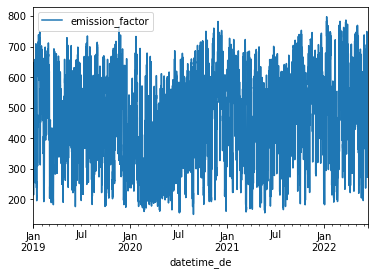

In [237]:
co2_factor_long.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

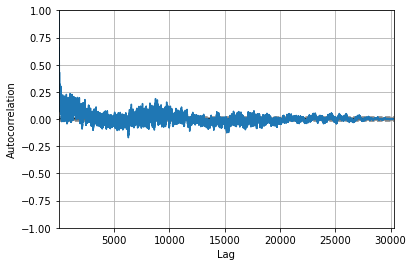

In [238]:
autocorrelation_plot(co2_factor_long)

In [239]:
result = adfuller(co2_factor_long)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('Fail to reject Null - Hypothesis: time series is non-stationary')
else:
    print('Reject Null - Hypothesis: time series is stationary')

ADF Statistic: -15.513357
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Null - Hypothesis: time series is stationary


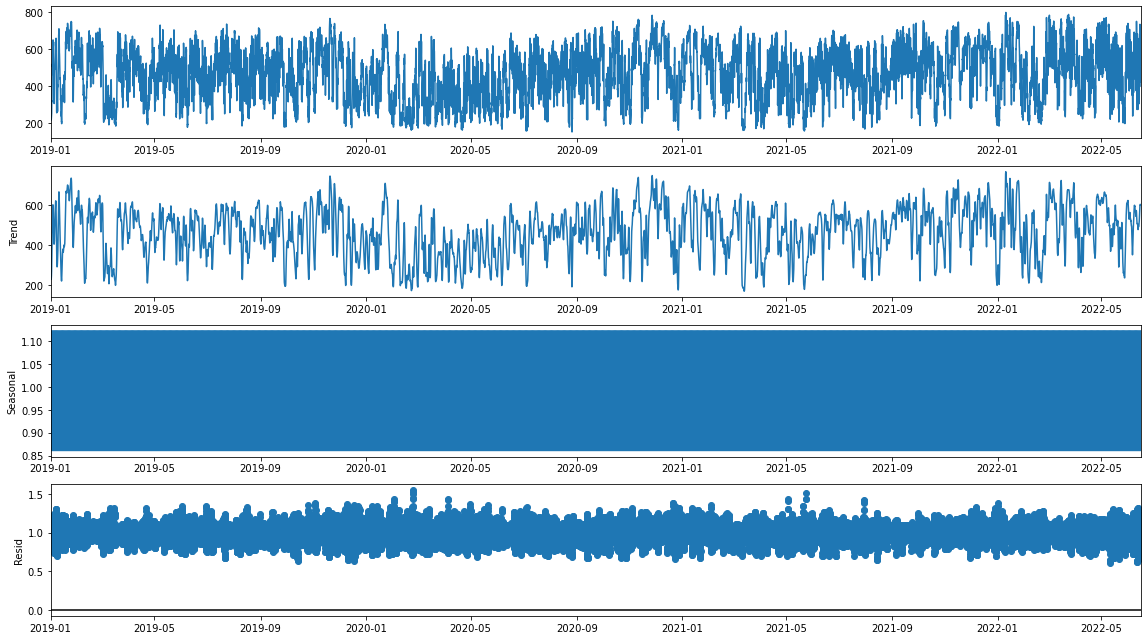

In [240]:
result3 = seasonal_decompose(co2_factor_long, model = 'multiplicative', period = 24)
fig_co2_long = result3.plot()
fig_co2_long.set_size_inches((16, 9))
fig_co2_long.tight_layout()
plt.show()

(447074.0, 447170.0)

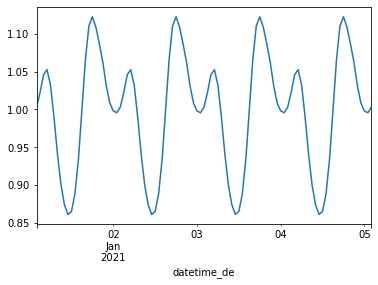

In [241]:
result3.seasonal.plot()
plt.xlim('2021-01-01 02:00:00+00:00','2021-01-05 02:00:00+00:00')

## 6. Check correlation of the potential features of the forecast

In [46]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)

In [47]:
co2_lag = make_lags(co2_factor, lags = 125)
co2_lag = co2_lag.fillna(0.0)
co2_lag.head(24)

y_lag_1         y_lag_2         y_lag_3  \
                          emission_factor emission_factor emission_factor   
datetime_de                                                                 
2021-01-01 00:00:00+00:00        0.000000        0.000000        0.000000   
2021-01-01 01:00:00+00:00      584.946289        0.000000        0.000000   
2021-01-01 02:00:00+00:00      594.096519      584.946289        0.000000   
2021-01-01 03:00:00+00:00      606.615312      594.096519      584.946289   
2021-01-01 04:00:00+00:00      610.849916      606.615312      594.096519   
2021-01-01 05:00:00+00:00      619.394920      610.849916      606.615312   
2021-01-01 06:00:00+00:00      626.703158      619.394920      610.849916   
2021-01-01 07:00:00+00:00      621.802205      626.703158      619.394920   
2021-01-01 08:00:00+00:00      619.255323      621.802205      626.703158   
2021-01-01 09:00:00+00:00      602.259399      619.255323      621.802205   
2021-01-01 10:00:00+00:00      575.571870      602.259399      619.255323   
2021-01-01 11:00:00+00:00      560.773605      575.571870      602.259399   
2021-01-01 12:00:00+00:00      553.821537      560.773605      575.571870   
2021-01-01 13:00:00+00:00      559.373661      553.821537      560.773605   
2021-01-01 14:00:00+00:00      574.583555      559.373661      553.821537   
2021-01-01 15:00:00+00:00      597.734568      574.583555      559.373661   
2021-01-01 16:00:00+00:00      601.490221      597.734568      574.583555   
2021-01-01 17:00:00+00:00      598.065563      601.490221      597.734568   
2021-01-01 18:00:00+00:00      589.862850      598.065563      601.490221   
2021-01-01 19:00:00+00:00      584.911747      589.862850      598.065563   
2021-01-01 20:00:00+00:00      579.823420      584.911747      589.862850   
2021-01-01 21:00:00+00:00      572.040623      579.823420      584.911747   
2021-01-01 22:00:00+00:00      562.429852      572.040623      579.823420   
2021-01-01 23:00:00+00:00      561.185656      562.429852      572.040623   

                                  y_lag_4         y_lag_5         y_lag_6  \
                          emission_factor emission_factor emission_factor   
datetime_de                                                                 
2021-01-01 00:00:00+00:00        0.000000        0.000000        0.000000   
2021-01-01 01:00:00+00:00        0.000000        0.000000        0.000000   
2021-01-01 02:00:00+00:00        0.000000        0.000000        0.000000   
2021-01-01 03:00:00+00:00        0.000000        0.000000        0.000000   
2021-01-01 04:00:00+00:00      584.946289        0.000000        0.000000   
2021-01-01 05:00:00+00:00      594.096519      584.946289        0.000000   
2021-01-01 06:00:00+00:00      606.615312      594.096519      584.946289   
2021-01-01 07:00:00+00:00      610.849916      606.615312      594.096519   
2021-01-01 08:00:00+00:00      619.394920      610.849916      606.615312   
2021-01-01 09:00:00+00:00      626.703158      619.394920      610.849916   
2021-01-01 10:00:00+00:00      621.802205      626.703158      619.394920   
2021-01-01 11:00:00+00:00      619.255323      621.802205      626.703158   
2021-01-01 12:00:00+00:00      602.259399      619.255323      621.802205   
2021-01-01 13:00:00+00:00      575.571870      602.259399      619.255323   
2021-01-01 14:00:00+00:00      560.773605      575.571870      602.259399   
2021-01-01 15:00:00+00:00      553.821537      560.773605      575.571870   
2021-01-01 16:00:00+00:00      559.373661      553.821537      560.773605   
2021-01-01 17:00:00+00:00      574.583555      559.373661      553.821537   
2021-01-01 18:00:00+00:00      597.734568      574.583555      559.373661   
2021-01-01 19:00:00+00:00      601.490221      597.734568      574.583555   
2021-01-01 20:00:00+00:00      598.065563      601.490221      597.734568   
2021-01-01 21:00:00+00:00      589.862850      598.065563      601.490221   
2021-01-01 22:00:00+00:00    

In [48]:
#correlation[['co2_24_lag','co2_25_lag', 'co2_26_lag','co2_46_lag','co2_47_lag','co2_48_lag','co2_49_lag','co2_71_lag','co2_72_lag','co2_73_lag','co2_74_lag', 'co2_95_lag','co2_96_lag','co2_97_lag','co2_98_lag', 'co2_119_lag','co2_120_lag','co2_121_lag','co2_122_lag']] = co2_lag[['y_lag_24','y_lag_25','y_lag_26','y_lag_46','y_lag_47','y_lag_48','y_lag_49', 'y_lag_71','y_lag_72','y_lag_73','y_lag_74', 'y_lag_95','y_lag_96','y_lag_97','y_lag_98','y_lag_119','y_lag_120','y_lag_121','y_lag_122' ]].set_index(correlation.index)

#correlation = correlation.fillna(0.0
#,'co2_3_lag','co2_23_lag','co2_24_lag','co2_26_lag'
#,'co2_3_lag','co2_23_lag','co2_24_lag','co2_26_lag'
#correlation.head()

In [49]:
correlation[['co2_24_lag','co2_25_lag', 'co2_26_lag']] = co2_lag[['y_lag_24','y_lag_25','y_lag_26']].set_index(correlation.index)

#correlation = correlation.fillna(0.0
#,'co2_3_lag','co2_23_lag','co2_24_lag','co2_26_lag'
#,'co2_3_lag','co2_23_lag','co2_24_lag','co2_26_lag'
correlation.head()

epoch_utc   windon  windoff  solar      load  prices  \
0  1.609459e+09  3653.75   464.75    0.0  41599.25   48.19   
1  1.609463e+09  3218.00   426.00    0.0  40513.50   44.68   
2  1.609466e+09  2867.75   398.25    0.0  40148.00   42.92   
3  1.609470e+09  2617.00   377.00    0.0  39846.75   40.39   
4  1.609474e+09  2439.00   357.25    0.0  39191.75   40.20   

                datetime_de  emission_factor  generation_forecast_aggregated  \
0 2021-01-01 00:00:00+00:00       584.946289                           43265   
1 2021-01-01 01:00:00+00:00       594.096519                           42286   
2 2021-01-01 02:00:00+00:00       606.615312                           41435   
3 2021-01-01 03:00:00+00:00       610.849916                           40897   
4 2021-01-01 04:00:00+00:00       619.394920                           42522   

   latest_forecasted_precipitation_avg  ...  export_LU_forecast  \
0                                 0.57  ...                 356   
1                                 0.05  ...                 349   
2                                 0.11  ...                 346   
3                                 0.17  ...                 347   
4                                 0.20  ...                 350   

   import_NL_forecast  export_NL_forecast  import_PL_forecast  \
0                   0                1692                   0   
1                   0                1938                   0   
2                   0                1984                   0   
3                   0                1801                   0   
4                   0                1965                   0   

   export_PL_forecast  import_CH_forecast  export_CH_forecast  co2_24_lag  \
0                   0                 405                1114         0.0   
1                   0                 507                1382         0.0   
2                   0                 291                1127         0.0   
3                   0                 318                1092         0.0   
4                   0                 328                1248         0.0   

   co2_25_lag  co2_26_lag  
0         0.0         0.0  
1         0.0         0.0  
2         0.0         0.0  
3         0.0         0.0  
4         0.0         0.0  

[5 rows x 36 columns]

In [50]:
import matplotlib.pyplot as plt

In [51]:
correlation['hour_of_day'] = correlation.datetime_de.dt.hour
correlation['day_of_week'] = correlation.datetime_de.dt.weekday
correlation['hour_of_year'] = ((correlation.datetime_de.dt.dayofyear-1) * 24) + correlation.datetime_de.dt.hour
correlation = correlation.drop(columns=['datetime_de', 'epoch_utc'])
correlation.head()

windon  windoff  solar      load  prices  emission_factor  \
0  3653.75   464.75    0.0  41599.25   48.19       584.946289   
1  3218.00   426.00    0.0  40513.50   44.68       594.096519   
2  2867.75   398.25    0.0  40148.00   42.92       606.615312   
3  2617.00   377.00    0.0  39846.75   40.39       610.849916   
4  2439.00   357.25    0.0  39191.75   40.20       619.394920   

   generation_forecast_aggregated  latest_forecasted_precipitation_avg  \
0                           43265                                 0.57   
1                           42286                                 0.05   
2                           41435                                 0.11   
3                           40897                                 0.17   
4                           42522                                 0.20   

   latest_forecasted_dewpoint_avg  latest_forecasted_temperature_avg  ...  \
0                          272.75                             274.25  ...   
1                          272.62                             274.12  ...   
2                          272.53                             274.03  ...   
3                          272.58                             274.06  ...   
4                          272.49                             273.98  ...   

   import_PL_forecast  export_PL_forecast  import_CH_forecast  \
0                   0                   0                 405   
1                   0                   0                 507   
2                   0                   0                 291   
3                   0                   0                 318   
4                   0                   0                 328   

   export_CH_forecast  co2_24_lag  co2_25_lag  co2_26_lag  hour_of_day  \
0                1114         0.0         0.0         0.0            0   
1                1382         0.0         0.0         0.0            1   
2                1127         0.0         0.0         0.0            2   
3                1092         0.0         0.0         0.0            3   
4                1248         0.0         0.0         0.0            4   

   day_of_week  hour_of_year  
0            4             0  
1            4             1  
2            4             2  
3            4             3  
4            4             4  

[5 rows x 37 columns]

In [52]:
correlation['day_of_week'].replace({0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'}, inplace=True)
correlation = pd.get_dummies(correlation, columns=['day_of_week'])
#correlation = correlation.drop(columns=['day_of_week_mon'])
correlation.head()

windon  windoff  solar      load  prices  emission_factor  \
0  3653.75   464.75    0.0  41599.25   48.19       584.946289   
1  3218.00   426.00    0.0  40513.50   44.68       594.096519   
2  2867.75   398.25    0.0  40148.00   42.92       606.615312   
3  2617.00   377.00    0.0  39846.75   40.39       610.849916   
4  2439.00   357.25    0.0  39191.75   40.20       619.394920   

   generation_forecast_aggregated  latest_forecasted_precipitation_avg  \
0                           43265                                 0.57   
1                           42286                                 0.05   
2                           41435                                 0.11   
3                           40897                                 0.17   
4                           42522                                 0.20   

   latest_forecasted_dewpoint_avg  latest_forecasted_temperature_avg  ...  \
0                          272.75                             274.25  ...   
1                          272.62                             274.12  ...   
2                          272.53                             274.03  ...   
3                          272.58                             274.06  ...   
4                          272.49                             273.98  ...   

   co2_26_lag  hour_of_day  hour_of_year  day_of_week_fri  day_of_week_mon  \
0         0.0            0             0                1                0   
1         0.0            1             1                1                0   
2         0.0            2             2                1                0   
3         0.0            3             3                1                0   
4         0.0            4             4                1                0   

   day_of_week_sat  day_of_week_sun  day_of_week_thu  day_of_week_tue  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   day_of_week_wed  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 43 columns]

In [53]:
corr_features = ['hour_of_day', 'hour_of_year']
corr_numbers = [24, 8760]
for f, n in zip(corr_features, corr_numbers):
    correlation[f + '_sin'] = np.sin(correlation[f]*(2.*np.pi/n))
    correlation[f + '_cos'] = np.cos(correlation[f]*(2.*np.pi/n))
correlation.drop(columns=corr_features, inplace=True)
correlation.head()

windon  windoff  solar      load  prices  emission_factor  \
0  3653.75   464.75    0.0  41599.25   48.19       584.946289   
1  3218.00   426.00    0.0  40513.50   44.68       594.096519   
2  2867.75   398.25    0.0  40148.00   42.92       606.615312   
3  2617.00   377.00    0.0  39846.75   40.39       610.849916   
4  2439.00   357.25    0.0  39191.75   40.20       619.394920   

   generation_forecast_aggregated  latest_forecasted_precipitation_avg  \
0                           43265                                 0.57   
1                           42286                                 0.05   
2                           41435                                 0.11   
3                           40897                                 0.17   
4                           42522                                 0.20   

   latest_forecasted_dewpoint_avg  latest_forecasted_temperature_avg  ...  \
0                          272.75                             274.25  ...   
1                          272.62                             274.12  ...   
2                          272.53                             274.03  ...   
3                          272.58                             274.06  ...   
4                          272.49                             273.98  ...   

   day_of_week_mon  day_of_week_sat  day_of_week_sun  day_of_week_thu  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   day_of_week_tue  day_of_week_wed  hour_of_day_sin  hour_of_day_cos  \
0                0                0         0.000000         1.000000   
1                0                0         0.258819         0.965926   
2                0                0         0.500000         0.866025   
3                0                0         0.707107         0.707107   
4                0                0         0.866025         0.500000   

   hour_of_year_sin  hour_of_year_cos  
0          0.000000          1.000000  
1          0.000717          1.000000  
2          0.001435          0.999999  
3          0.002152          0.999998  
4          0.002869          0.999996  

[5 rows x 45 columns]

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

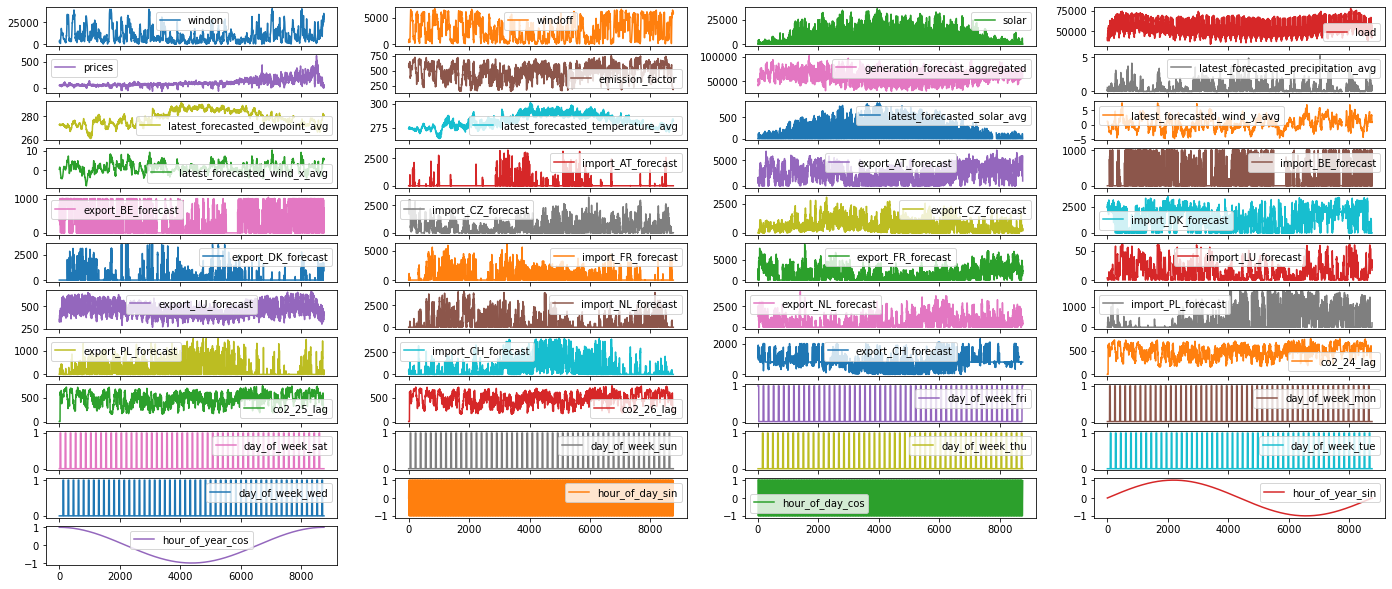

In [54]:
correlation.plot(subplots=True, layout=(14, 4), figsize=(24, 12))

In [55]:
emission_factor = correlation['emission_factor']
emission_factor.head()

0    584.946289
1    594.096519
2    606.615312
3    610.849916
4    619.394920
Name: emission_factor, dtype: float64

In [56]:
features = correlation.drop(columns=['emission_factor'])
features.head()

windon  windoff  solar      load  prices  generation_forecast_aggregated  \
0  3653.75   464.75    0.0  41599.25   48.19                           43265   
1  3218.00   426.00    0.0  40513.50   44.68                           42286   
2  2867.75   398.25    0.0  40148.00   42.92                           41435   
3  2617.00   377.00    0.0  39846.75   40.39                           40897   
4  2439.00   357.25    0.0  39191.75   40.20                           42522   

   latest_forecasted_precipitation_avg  latest_forecasted_dewpoint_avg  \
0                                 0.57                          272.75   
1                                 0.05                          272.62   
2                                 0.11                          272.53   
3                                 0.17                          272.58   
4                                 0.20                          272.49   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  ...  \
0                             274.25                          0.0  ...   
1                             274.12                          0.0  ...   
2                             274.03                          0.0  ...   
3                             274.06                          0.0  ...   
4                             273.98                          0.0  ...   

   day_of_week_mon  day_of_week_sat  day_of_week_sun  day_of_week_thu  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   day_of_week_tue  day_of_week_wed  hour_of_day_sin  hour_of_day_cos  \
0                0                0         0.000000         1.000000   
1                0                0         0.258819         0.965926   
2                0                0         0.500000         0.866025   
3                0                0         0.707107         0.707107   
4                0                0         0.866025         0.500000   

   hour_of_year_sin  hour_of_year_cos  
0          0.000000          1.000000  
1          0.000717          1.000000  
2          0.001435          0.999999  
3          0.002152          0.999998  
4          0.002869          0.999996  

[5 rows x 44 columns]

In [57]:
features.columns

Index(['windon', 'windoff', 'solar', 'load', 'prices',
       'generation_forecast_aggregated', 'latest_forecasted_precipitation_avg',
       'latest_forecasted_dewpoint_avg', 'latest_forecasted_temperature_avg',
       'latest_forecasted_solar_avg', 'latest_forecasted_wind_y_avg',
       'latest_forecasted_wind_x_avg', 'import_AT_forecast',
       'export_AT_forecast', 'import_BE_forecast', 'export_BE_forecast',
       'import_CZ_forecast', 'export_CZ_forecast', 'import_DK_forecast',
       'export_DK_forecast', 'import_FR_forecast', 'export_FR_forecast',
       'import_LU_forecast', 'export_LU_forecast', 'import_NL_forecast',
       'export_NL_forecast', 'import_PL_forecast', 'export_PL_forecast',
       'import_CH_forecast', 'export_CH_forecast', 'co2_24_lag', 'co2_25_lag',
       'co2_26_lag', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_sat',
       'day_of_week_sun', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'hour_of_day_sin', 'hour_of_day_cos',
      

In [58]:
features.head()

windon  windoff  solar      load  prices  generation_forecast_aggregated  \
0  3653.75   464.75    0.0  41599.25   48.19                           43265   
1  3218.00   426.00    0.0  40513.50   44.68                           42286   
2  2867.75   398.25    0.0  40148.00   42.92                           41435   
3  2617.00   377.00    0.0  39846.75   40.39                           40897   
4  2439.00   357.25    0.0  39191.75   40.20                           42522   

   latest_forecasted_precipitation_avg  latest_forecasted_dewpoint_avg  \
0                                 0.57                          272.75   
1                                 0.05                          272.62   
2                                 0.11                          272.53   
3                                 0.17                          272.58   
4                                 0.20                          272.49   

   latest_forecasted_temperature_avg  latest_forecasted_solar_avg  ...  \
0                             274.25                          0.0  ...   
1                             274.12                          0.0  ...   
2                             274.03                          0.0  ...   
3                             274.06                          0.0  ...   
4                             273.98                          0.0  ...   

   day_of_week_mon  day_of_week_sat  day_of_week_sun  day_of_week_thu  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   day_of_week_tue  day_of_week_wed  hour_of_day_sin  hour_of_day_cos  \
0                0                0         0.000000         1.000000   
1                0                0         0.258819         0.965926   
2                0                0         0.500000         0.866025   
3                0                0         0.707107         0.707107   
4                0                0         0.866025         0.500000   

   hour_of_year_sin  hour_of_year_cos  
0          0.000000          1.000000  
1          0.000717          1.000000  
2          0.001435          0.999999  
3          0.002152          0.999998  
4          0.002869          0.999996  

[5 rows x 44 columns]

### Pearson correlation

In [99]:
#import seaborn as sns
#sns.set(font_scale = 1.4)
pearson = features.corrwith(emission_factor, method = 'pearson')
corr_factors_df = pd.DataFrame(pearson, columns = ['Pearson coefficient'])
corr_factors_df.head()

Pearson coefficient
windon             -0.684964
windoff            -0.508468
solar              -0.386437
load                0.058618
prices              0.533530

In [79]:
pearson_df= pd.DataFrame(pearson, columns = ['Pearson coefficient'])
pearson_df.head()

Pearson coefficient
windon             -0.684964
windoff            -0.508468
solar              -0.386437
load                0.058618
prices              0.533530

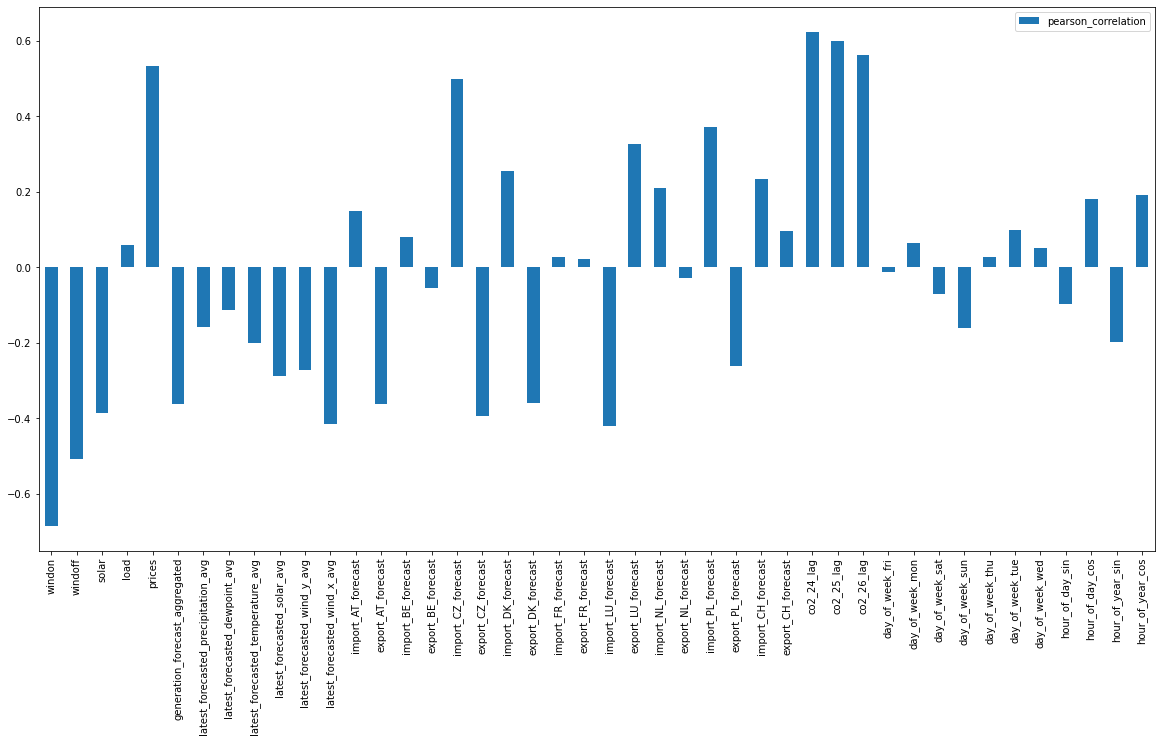

In [61]:
#make a bar chart
#plt.figure(figsize=(20,5))
pearson_bar = corr_factors_df.plot.bar(figsize=(20,10))
#plt.show()

In [62]:
pearson_of_features = features.corr(method = 'pearson')
pearson_of_features.head()

windon   windoff     solar      load    prices  \
windon   1.000000  0.706344 -0.162923  0.088381 -0.283391   
windoff  0.706344  1.000000 -0.171160  0.129057 -0.124812   
solar   -0.162923 -0.171160  1.000000  0.350786 -0.184000   
load     0.088381  0.129057  0.350786  1.000000  0.327696   
prices  -0.283391 -0.124812 -0.184000  0.327696  1.000000   

         generation_forecast_aggregated  latest_forecasted_precipitation_avg  \
windon                         0.434245                             0.251813   
windoff                        0.382044                             0.068695   
solar                          0.508121                            -0.076387   
load                           0.785171                             0.047811   
prices                        -0.020164                            -0.107420   

         latest_forecasted_dewpoint_avg  latest_forecasted_temperature_avg  \
windon                        -0.224455                          -0.237604   
windoff                       -0.229110                          -0.245871   
solar                          0.274612                           0.490511   
load                          -0.136363                          -0.037904   
prices                        -0.028148                          -0.067037   

         latest_forecasted_solar_avg  ...  day_of_week_mon  day_of_week_sat  \
windon                     -0.168701  ...        -0.042149        -0.043207   
windoff                    -0.195099  ...        -0.006173        -0.081338   
solar                       0.770115  ...         0.000418         0.011061   
load                        0.317313  ...         0.076527        -0.252249   
prices                     -0.161853  ...         0.054052        -0.069591   

         day_of_week_sun  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
windon          0.002091         0.045095        -0.013416         0.025248   
windoff         0.021768         0.032040        -0.042181         0.042638   
solar           0.005965        -0.010195        -0.006843        -0.002505   
load           -0.378772         0.153854         0.150930         0.157392   
prices         -0.142710         0.051805         0.063964         0.051757   

         hour_of_day_sin  hour_of_day_cos  hour_of_year_sin  hour_of_year_cos  
windon         -0.034668         0.037485          0.090726          0.276064  
windoff        -0.022108         0.012135         -0.025167          0.376280  
solar           0.226543        -0.678609          0.055566         -0.363573  
load           -0.029160        -0.679373         -0.001088          0.240533  
prices         -0.060455        -0.106523         -0.506155          0.281855  

[5 rows x 44 columns]

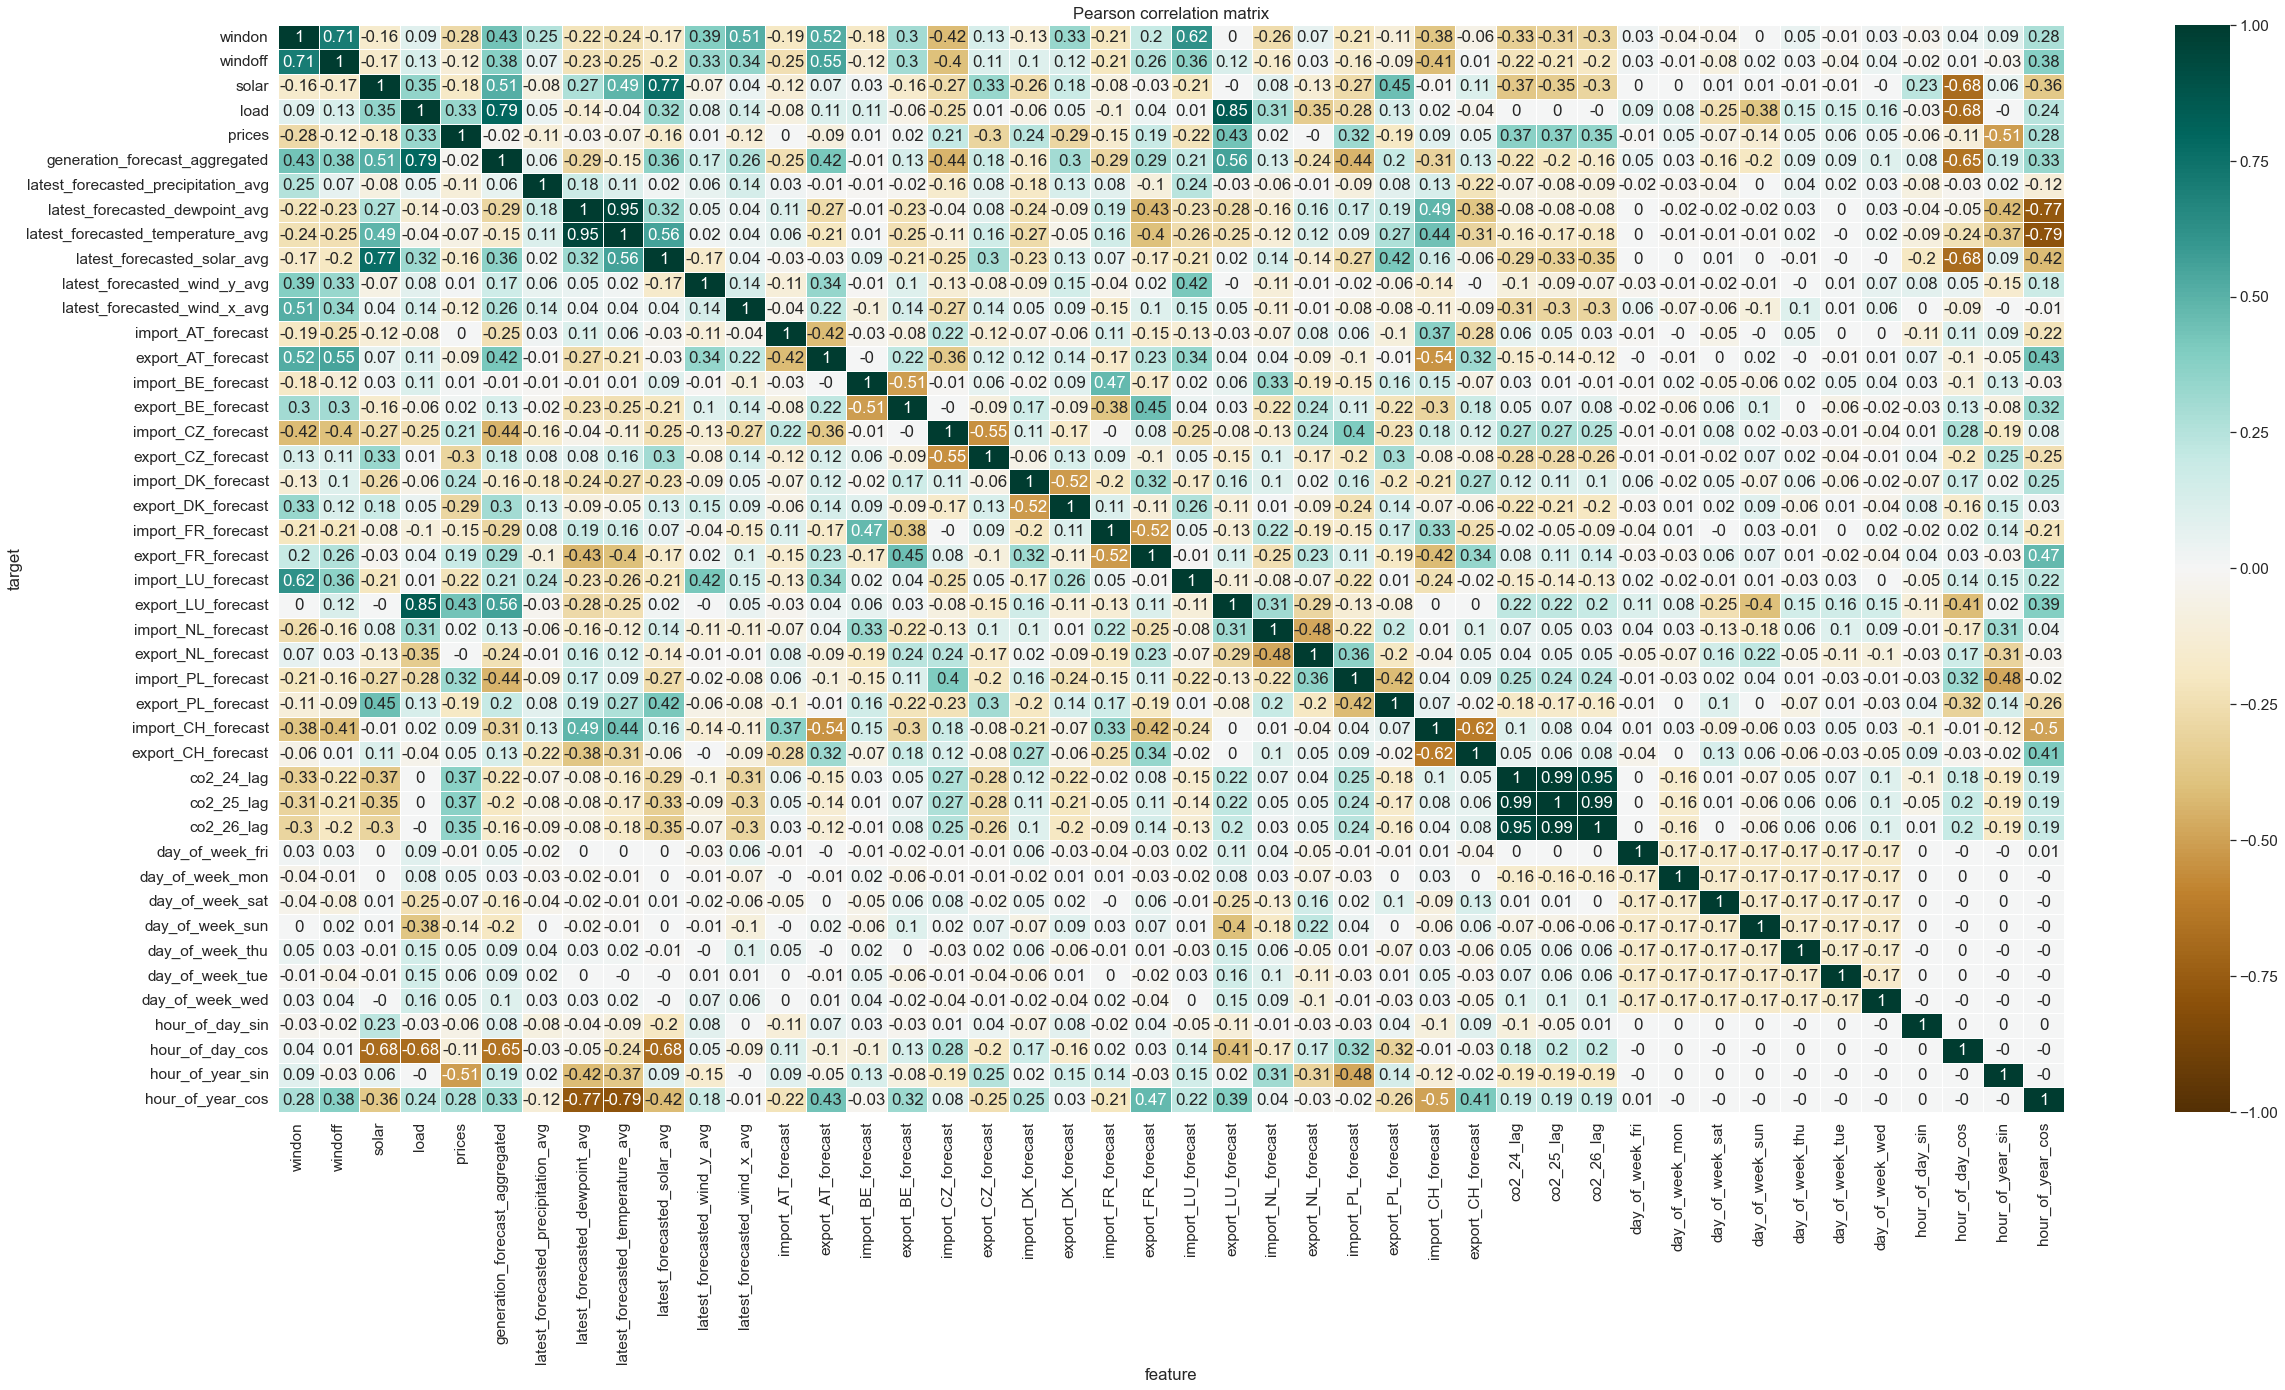

In [106]:
import seaborn as sns
def corr_heatmap(df, title : str):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title(title)
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax
sns.set(font_scale = 1.4)
plt.figure(figsize=(40,20))
pearson_of_features_rounded = pearson_of_features.round(2)
corr_heatmap(pearson_of_features_rounded, title = 'Pearson correlation matrix')
#plt.rc('font', size= 10)
plt.show()

In [117]:
def get_corr(df, threshold, method):
    values = {}
    for feature, data in  df.iteritems():
        for (value,index) in zip(data.values, data.index):
            if value not in values.values():
                if value > threshold and value != 1.1:
                    key = feature, index
                    values[key] = value
                if value < -threshold:
                    key = feature, index
                    values[key] = value
    values_df = pd.DataFrame.from_dict(values, orient = 'index', columns = [method])
    return values_df
threshold = 0.8
corr_pearson = get_corr(pearson_of_features_rounded, threshold, method = 'pearson_corr')
corr_pearson
#corr_pearson.style.highlight_between(left = 0.8, right = 1.0, axis = 0 ).highlight_between(left = -1.0, right = -0.8, axis = 0 )

C:\Users\ABajrami\AppData\Local\Temp/ipykernel_20572/987904165.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, data in  df.iteritems():


pearson_corr
(windon, windon)                                            1.00
(load, export_LU_forecast)                                  0.85
(latest_forecasted_dewpoint_avg, latest_forecas...          0.95
(co2_24_lag, co2_25_lag)                                    0.99

In [70]:
corr_pearson

pearson_corr
(windon, windon)                                            1.00
(windon, windoff)                                           0.71
(windon, import_LU_forecast)                                0.62
(solar, latest_forecasted_solar_avg)                        0.77
(solar, hour_of_day_cos)                                   -0.68
(load, generation_forecast_aggregated)                      0.79
(load, export_LU_forecast)                                  0.85
(generation_forecast_aggregated, hour_of_day_cos)          -0.65
(latest_forecasted_dewpoint_avg, latest_forecas...          0.95
(latest_forecasted_dewpoint_avg, hour_of_year_cos)         -0.77
(latest_forecasted_temperature_avg, hour_of_yea...         -0.79
(import_CH_forecast, export_CH_forecast)                   -0.62
(co2_24_lag, co2_25_lag)                                    0.99
(co2_24_lag, co2_46_lag)                                    0.63
(co2_24_lag, co2_47_lag)                                    0.64
(co2_24_lag, co2_49_lag)                                    0.61
(co2_46_lag, co2_49_lag)                                    0.91
(co2_47_lag, co2_71_lag)                                    0.65
(co2_49_lag, co2_72_lag)                                    0.66
(co2_72_lag, co2_95_lag)                                    0.67
(co2_95_lag, co2_97_lag)                                    0.96
(co2_96_lag, co2_119_lag)                                   0.68
(co2_119_lag, co2_122_lag)                                  0.92

### Spearman correlation

In [100]:
spearman = features.corrwith(emission_factor, method = 'spearman')
corr_factors_df['Spearman coefficient'] = spearman
spearman_df = pd.DataFrame(data = spearman, columns = ['spearman'])
spearman_df.head()

spearman
windon  -0.625011
windoff -0.498762
solar   -0.316364
load     0.039456
prices   0.565536

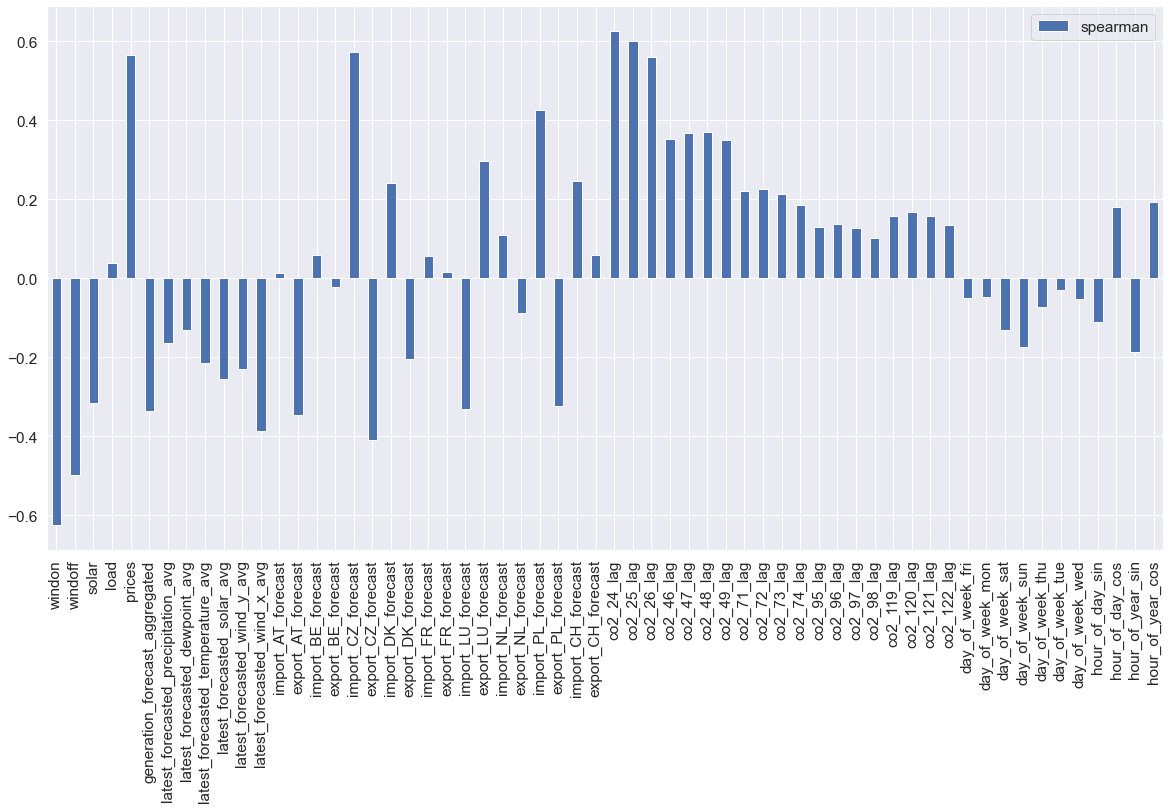

In [72]:
spearman_bar = spearman_df.plot.bar(figsize=(20,10))

In [64]:
colours = {'black': [0,0,0],
             'darkblue': '#1F4E79', 
             'middle_blue': '#3795D5',
             'light_blue' : '#D7E6F5',
             '1B' : '#356CA5',
             '1D' : '#8AB5E1',
             'dark_red': '#AB2626',
             'dark_orange':'#B77201',
             'gold':'#F7D507',
             'middle_orange' : '#EC9302',
             'dark_green' : '#41641A',
             'middle_green' : '#92D050',
             'dark_gray' : '#515151'
             }


In [90]:
yaxis.shape

(60,)

In [65]:
pearson_df.values.shape

(44, 1)

<Figure size 1728x576 with 0 Axes>

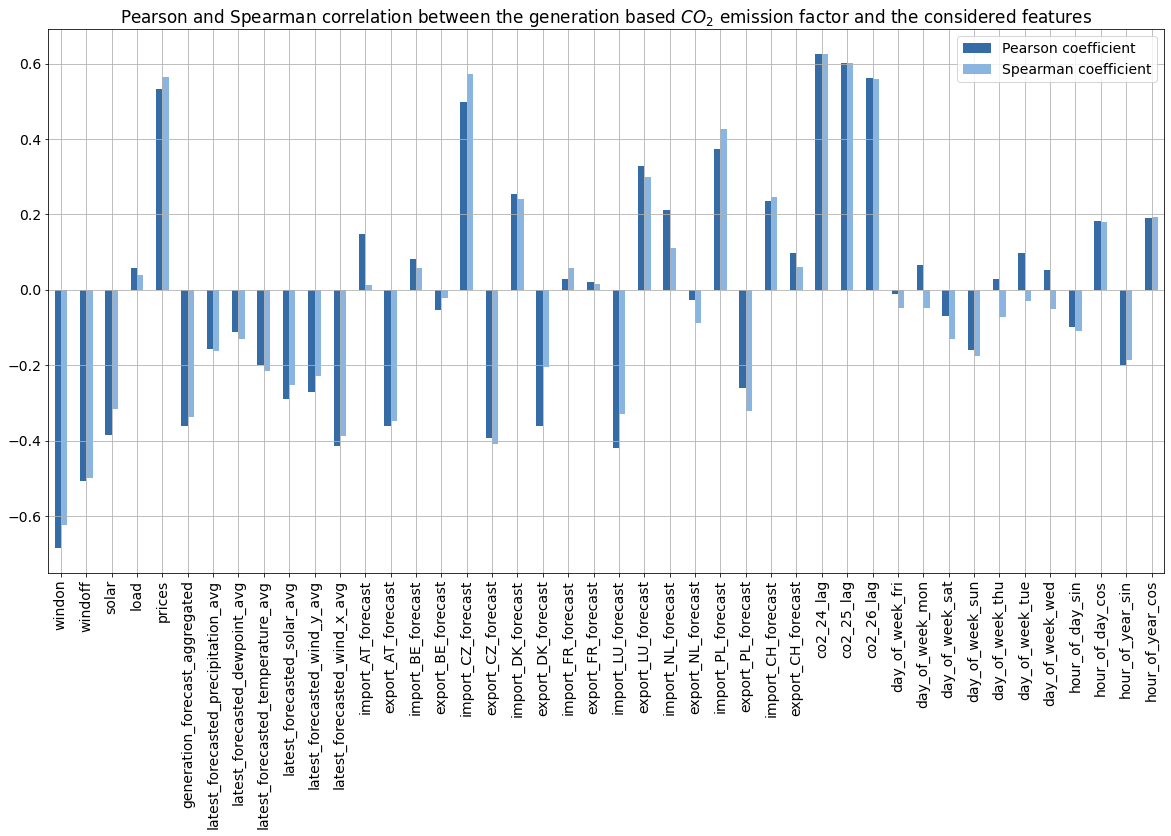

In [82]:
plt.figure(figsize = (24,8))
yaxis = np.arange(len(pearson_df))
#plt.bar(yaxis -0.2, pearson_df.values.reshape(len(pearson_df),), 0.4, color = colours.get('1B'), label = 'Pearson Score')
#plt.bar(yaxis +0.2, spearman_df.values.reshape(len(pearson_df),), 0.4,  color = colours.get('1D'), label = 'Spearman Score')
corr_factors_df.plot.bar(figsize = (20,10), color = [colours.get('1B'),colours.get('1D')])
#plt.xticks(yaxis, pearson_df.index)
plt.grid()
plt.title('Pearson and Spearman correlation between the generation based $CO_2$ emission factor and the considered features')
#plt.bar_label('Pearson Score')
#plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 14})
#plt.xlabel('features')
plt.legend(loc = 'best')
plt.show()




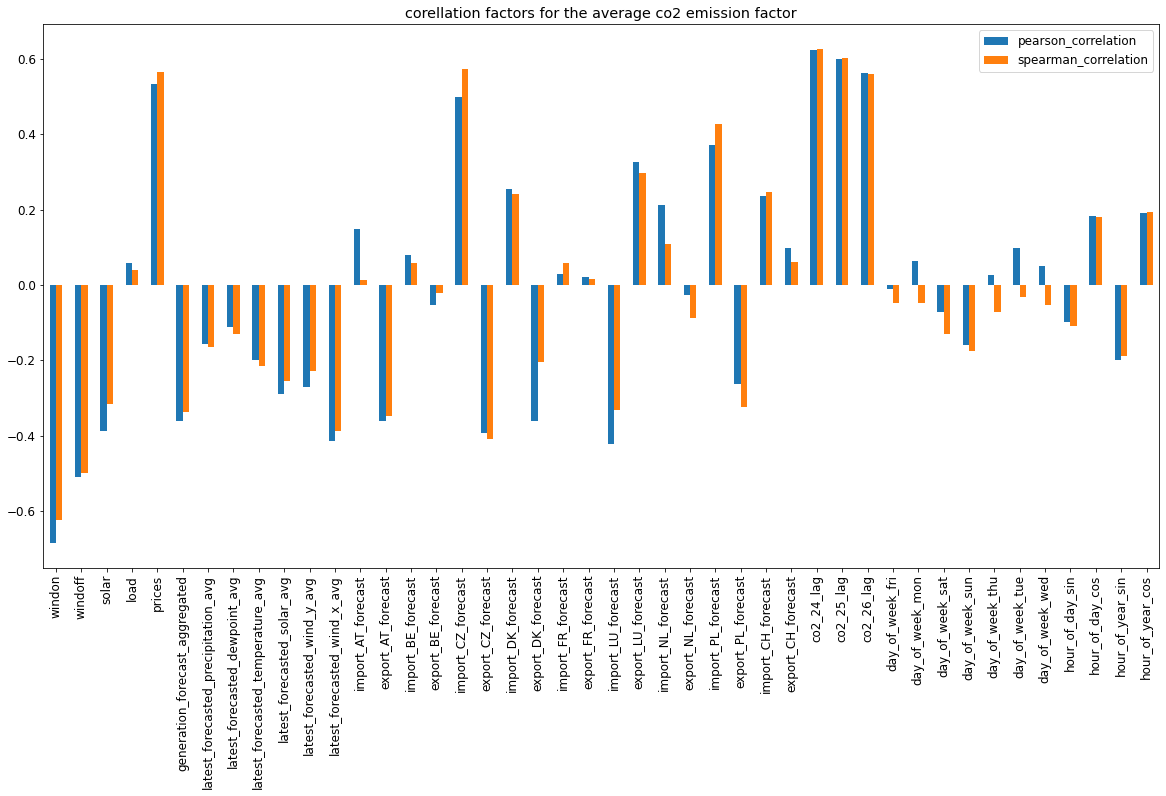

In [67]:
corr_factors_bar = corr_factors_df.plot.bar(figsize = (20,10), title = 'corellation factors for the average co2 emission factor')

In [101]:
# 0.2: weak correlation
corr_factors_df = corr_factors_df.round(4)
#corr_factors_df.style.bar(align=0, cmap="bwr", height=50, width=50, props="width: 120px; border-right: 1px solid black;").highlight_between(left = 0.2, right = 1.0, axis = 0 ).highlight_between(left = -1.0, right = -0.2, axis = 0)                          

In [102]:
corr_factors_df

Pearson coefficient  Spearman coefficient
windon                                           -0.6850               -0.6250
windoff                                          -0.5085               -0.4988
solar                                            -0.3864               -0.3164
load                                              0.0586                0.0395
prices                                            0.5335                0.5655
generation_forecast_aggregated                   -0.3614               -0.3367
latest_forecasted_precipitation_avg              -0.1576               -0.1633
latest_forecasted_dewpoint_avg                   -0.1124               -0.1302
latest_forecasted_temperature_avg                -0.1999               -0.2150
latest_forecasted_solar_avg                      -0.2886               -0.2537
latest_forecasted_wind_y_avg                     -0.2714               -0.2282
latest_forecasted_wind_x_avg                     -0.4148               -0.3877
import_AT_forecast                                0.1486                0.0134
export_AT_forecast                               -0.3613               -0.3472
import_BE_forecast                                0.0805                0.0583
export_BE_forecast                               -0.0544               -0.0215
import_CZ_forecast                                0.4984                0.5730
export_CZ_forecast                               -0.3931               -0.4093
import_DK_forecast                                0.2550                0.2414
export_DK_forecast                               -0.3606               -0.2043
import_FR_forecast                                0.0286                0.0575
export_FR_forecast                                0.0213                0.0165
import_LU_forecast                               -0.4208               -0.3307
export_LU_forecast                                0.3275                0.2983
import_NL_forecast                                0.2108                0.1097
export_NL_forecast                               -0.0278               -0.0887
import_PL_forecast                                0.3725                0.4271
export_PL_forecast                               -0.2617               -0.3227
import_CH_forecast                                0.2351                0.2469
export_CH_forecast                                0.0974                0.0598
co2_24_lag                                        0.6246                0.6263
co2_25_lag                                        0.6008                0.6016
co2_26_lag                                        0.5622                0.5604
day_of_week_fri                                  -0.0112               -0.0486
day_of_week_mon                                   0.0646               -0.0477
day_of_week_sat                                  -0.0706               -0.1302
day_of_week_sun                                  -0.1602               -0.1743
day_of_week_thu                                   0.0276               -0.0727
day_of_week_tue                                   0.0982               -0.0307
day_of_week_wed                                   0.0516               -0.0522
hour_of_day_sin                                  -0.0981               -0.1097
hour_of_day_cos                                   0.1820                0.1803
hour_of_year_sin                                 -0.1983               -0.1874
hour_of_year_cos                                  0.1915                0.1935

In [107]:
spearman_of_features = features.corr(method = 'spearman')
spearman_of_features.head()

windon   windoff     solar      load    prices  \
windon   1.000000  0.762007 -0.204537  0.045561 -0.339103   
windoff  0.762007  1.000000 -0.150605  0.118655 -0.209499   
solar   -0.204537 -0.150605  1.000000  0.481104 -0.048614   
load     0.045561  0.118655  0.481104  1.000000  0.270733   
prices  -0.339103 -0.209499 -0.048614  0.270733  1.000000   

         generation_forecast_aggregated  latest_forecasted_precipitation_avg  \
windon                         0.341733                             0.263500   
windoff                        0.363684                             0.106827   
solar                          0.510807                             0.003009   
load                           0.789938                             0.053618   
prices                        -0.124623                            -0.070776   

         latest_forecasted_dewpoint_avg  latest_forecasted_temperature_avg  \
windon                        -0.261178                          -0.283121   
windoff                       -0.234281                          -0.251431   
solar                          0.266378                           0.443048   
load                          -0.127482                          -0.040732   
prices                         0.224263                           0.171226   

         latest_forecasted_solar_avg  ...  day_of_week_mon  day_of_week_sat  \
windon                     -0.204300  ...        -0.013166        -0.041181   
windoff                    -0.177500  ...        -0.006383        -0.071755   
solar                       0.810910  ...        -0.000289         0.005804   
load                        0.461456  ...         0.077110        -0.251857   
prices                      0.001855  ...         0.052155        -0.077165   

         day_of_week_sun  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
windon          0.023848         0.028347        -0.030471        -0.002782   
windoff         0.033349         0.031082        -0.047357         0.033207   
solar           0.003199        -0.003773        -0.004257        -0.001764   
load           -0.368916         0.150721         0.148636         0.155198   
prices         -0.170806         0.053687         0.069589         0.053809   

         hour_of_day_sin  hour_of_day_cos  hour_of_year_sin  hour_of_year_cos  
windon         -0.059082         0.074916          0.088325          0.305735  
windoff        -0.021626         0.013660         -0.010845          0.366139  
solar           0.326769        -0.809781          0.054008         -0.331123  
load            0.014033        -0.675595         -0.004104          0.220054  
prices         -0.074067        -0.072062         -0.658888          0.047253  

[5 rows x 44 columns]

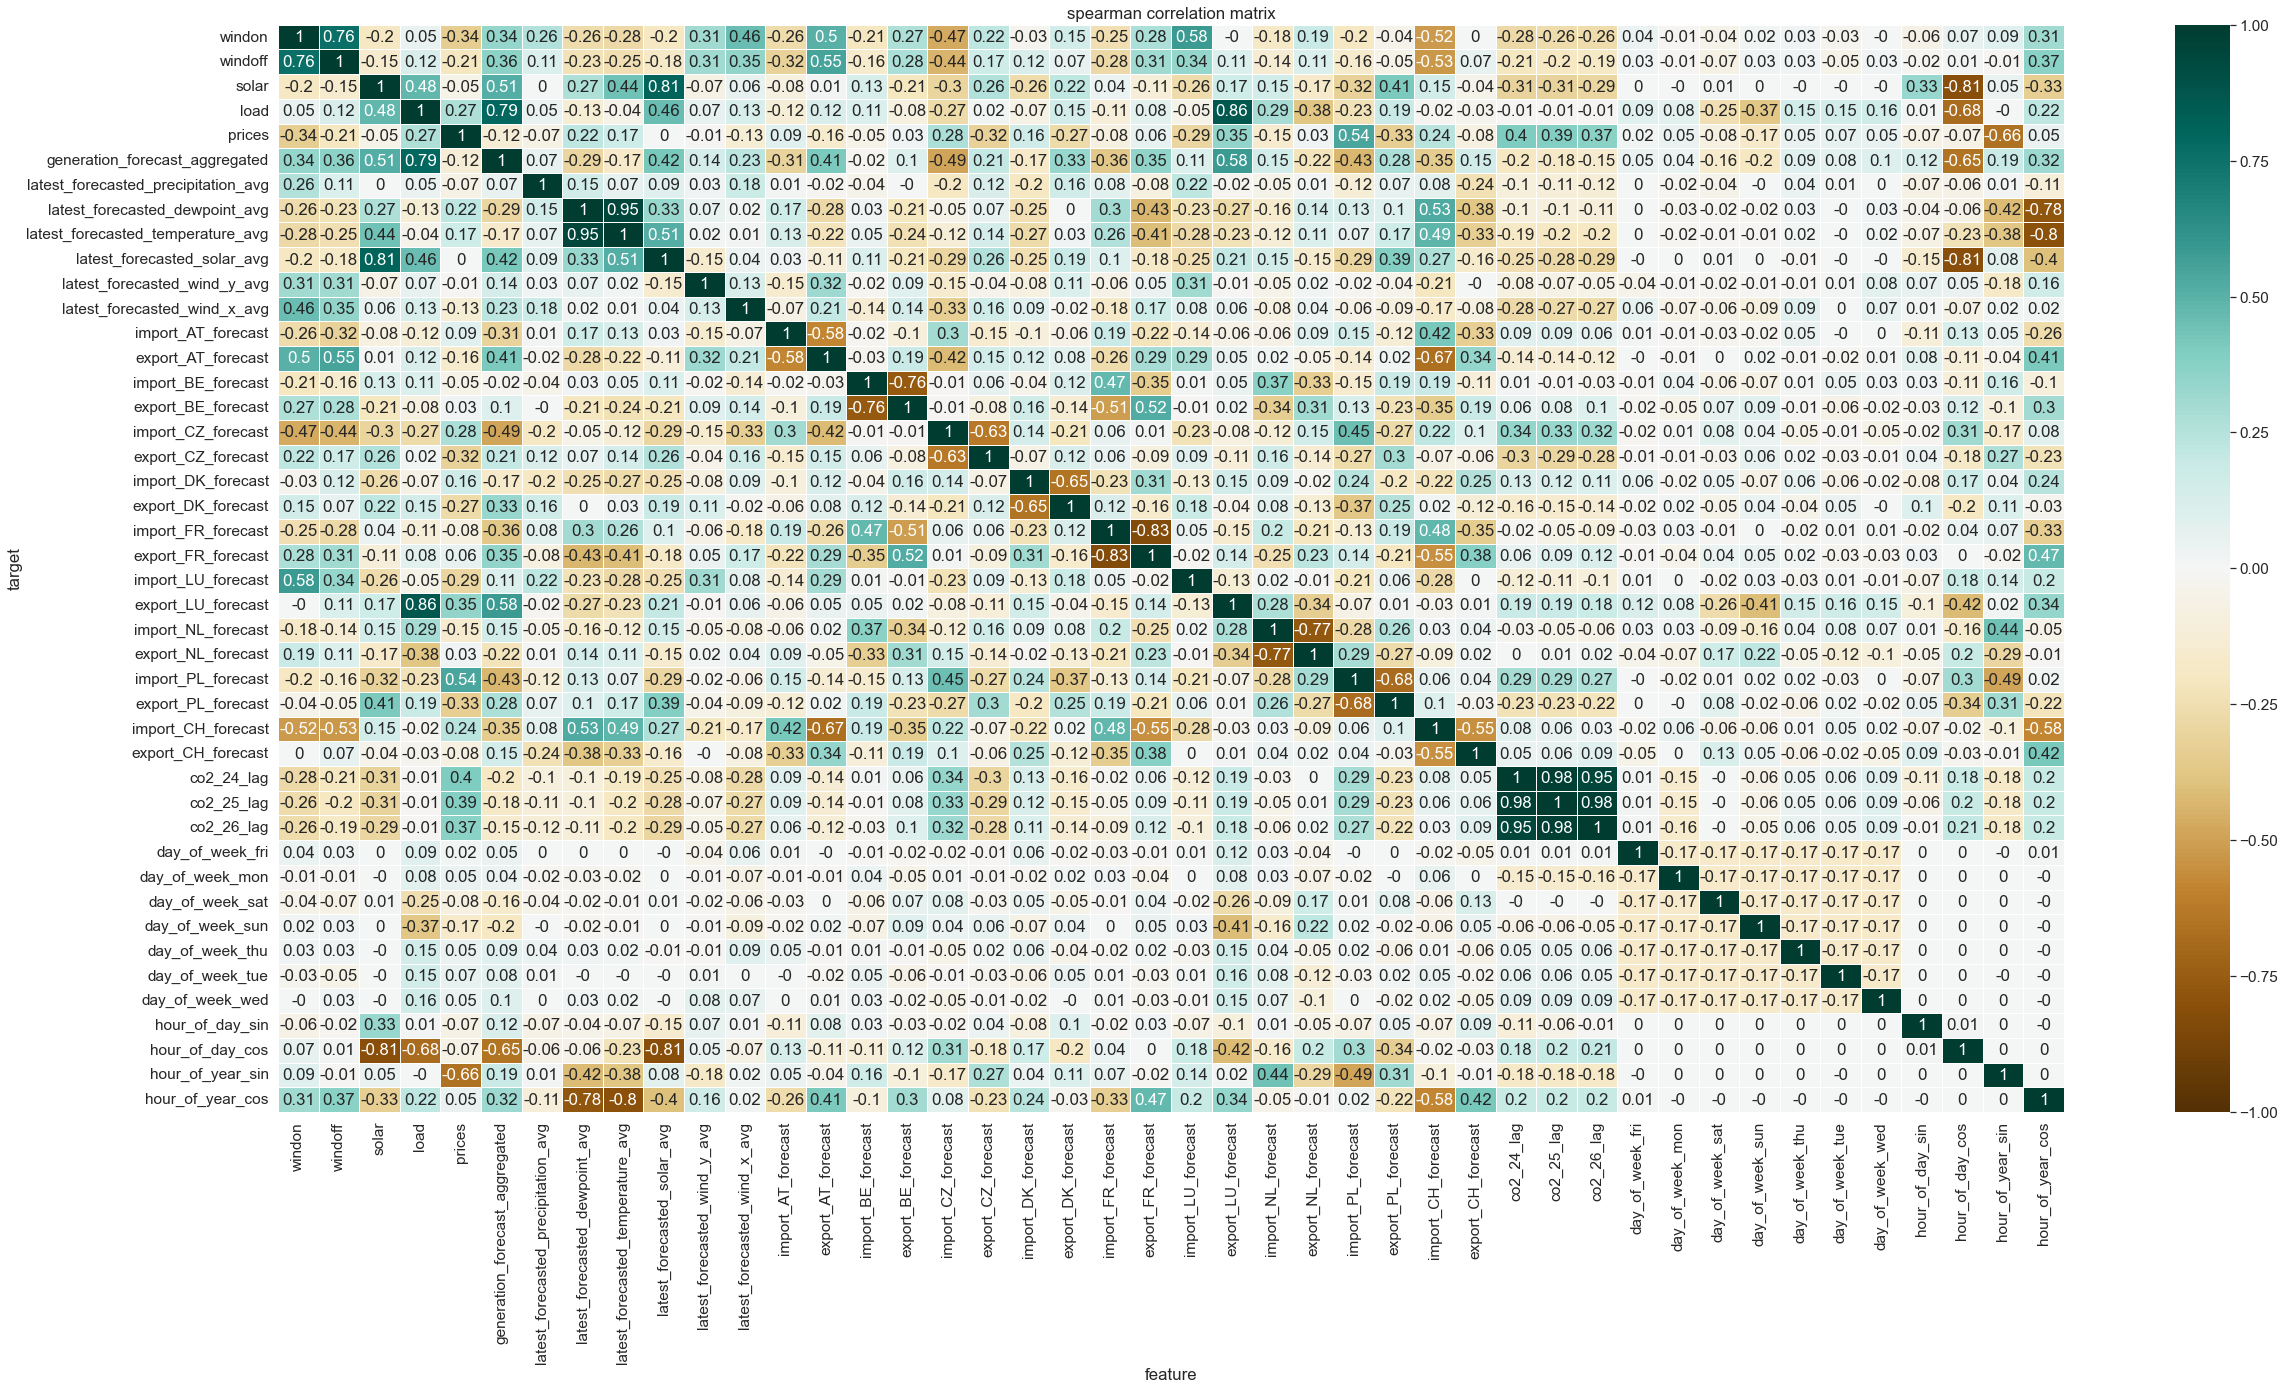

In [108]:
plt.figure(figsize=(40,20))
sns.set(font_scale = 1.4)
spearman_features_rounded = spearman_of_features.round(2)
corr_heatmap(spearman_features_rounded, title = 'spearman correlation matrix')
#plt.rc('font', size= 10)
plt.show()

In [118]:
#0.6: strong correlation, 0.8: very strong corr.
threshold = 0.8
corr_spearman = get_corr(spearman_features_rounded, threshold, method = 'spearman_corr')
corr_spearman.head()
#corr_spearman.style.highlight_between(left = 0.8, right = 1.0, axis = 0 ).highlight_between(left = -1.0, right = -0.8, axis = 0 )

C:\Users\ABajrami\AppData\Local\Temp/ipykernel_20572/987904165.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, data in  df.iteritems():


spearman_corr
(windon, windon)                                             1.00
(solar, latest_forecasted_solar_avg)                         0.81
(solar, hour_of_day_cos)                                    -0.81
(load, export_LU_forecast)                                   0.86
(latest_forecasted_dewpoint_avg, latest_forecas...           0.95

### Predictive Power Score

In [85]:
import ppscore as pps

In [114]:
def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax

In [86]:
pps_emf = pps.predictors(correlation, 'emission_factor', output = "df", sorted = False)
pps_emf.head()

x                y   ppscore        case  is_valid_score  \
0   windon  emission_factor  0.049479  regression            True   
1  windoff  emission_factor  0.000000  regression            True   
2    solar  emission_factor  0.000000  regression            True   
3     load  emission_factor  0.000000  regression            True   
4   prices  emission_factor  0.057211  regression            True   

                metric  baseline_score  model_score                    model  
0  mean absolute error      111.210846   105.708198  DecisionTreeRegressor()  
1  mean absolute error      111.210846   127.179029  DecisionTreeRegressor()  
2  mean absolute error      111.210846   118.817780  DecisionTreeRegressor()  
3  mean absolute error      111.210846   153.451370  DecisionTreeRegressor()  
4  mean absolute error      111.210846   104.848376  DecisionTreeRegressor()

In [89]:
pps_emf['x']

0                                  windon
1                                 windoff
2                                   solar
3                                    load
4                                  prices
5          generation_forecast_aggregated
6     latest_forecasted_precipitation_avg
7          latest_forecasted_dewpoint_avg
8       latest_forecasted_temperature_avg
9             latest_forecasted_solar_avg
10           latest_forecasted_wind_y_avg
11           latest_forecasted_wind_x_avg
12                     import_AT_forecast
13                     export_AT_forecast
14                     import_BE_forecast
15                     export_BE_forecast
16                     import_CZ_forecast
17                     export_CZ_forecast
18                     import_DK_forecast
19                     export_DK_forecast
20                     import_FR_forecast
21                     export_FR_forecast
22                     import_LU_forecast
23                     export_LU_f

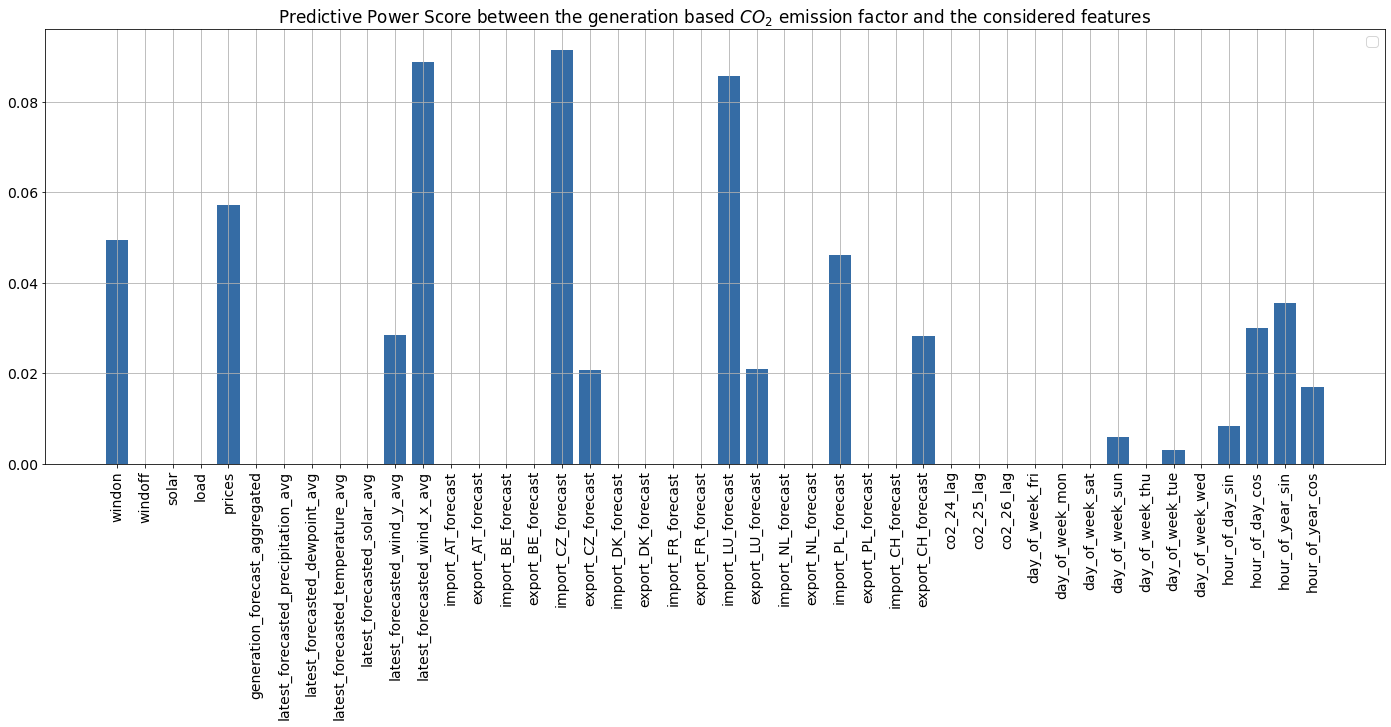

In [93]:
plt.figure(figsize = (24,8))
yaxis = np.arange(len(pearson_df))
#plt.bar(yaxis -0.2, pearson_df.values.reshape(len(pearson_df),), 0.4, color = colours.get('1B'), label = 'Pearson Score')
#plt.bar(yaxis +0.2, spearman_df.values.reshape(len(pearson_df),), 0.4,  color = colours.get('1D'), label = 'Spearman Score')
plt.bar(pps_emf['x'], pps_emf['ppscore'],  color = colours.get('1B'))
#pps_emf.plot.bar(figsize = (20,10), color = [colours.get('1B'),colours.get('1D')])
#plt.xticks(yaxis, pearson_df.index)
plt.grid()
plt.title('Predictive Power Score between the generation based $CO_2$ emission factor and the considered features')
#plt.bar_label('Pearson Score')
#plt.gca().invert_yaxis()
plt.rcParams.update({'font.size': 14})
#plt.xlabel('features')
plt.legend(loc = 'best')
plt.xticks(rotation=90)
plt.show()




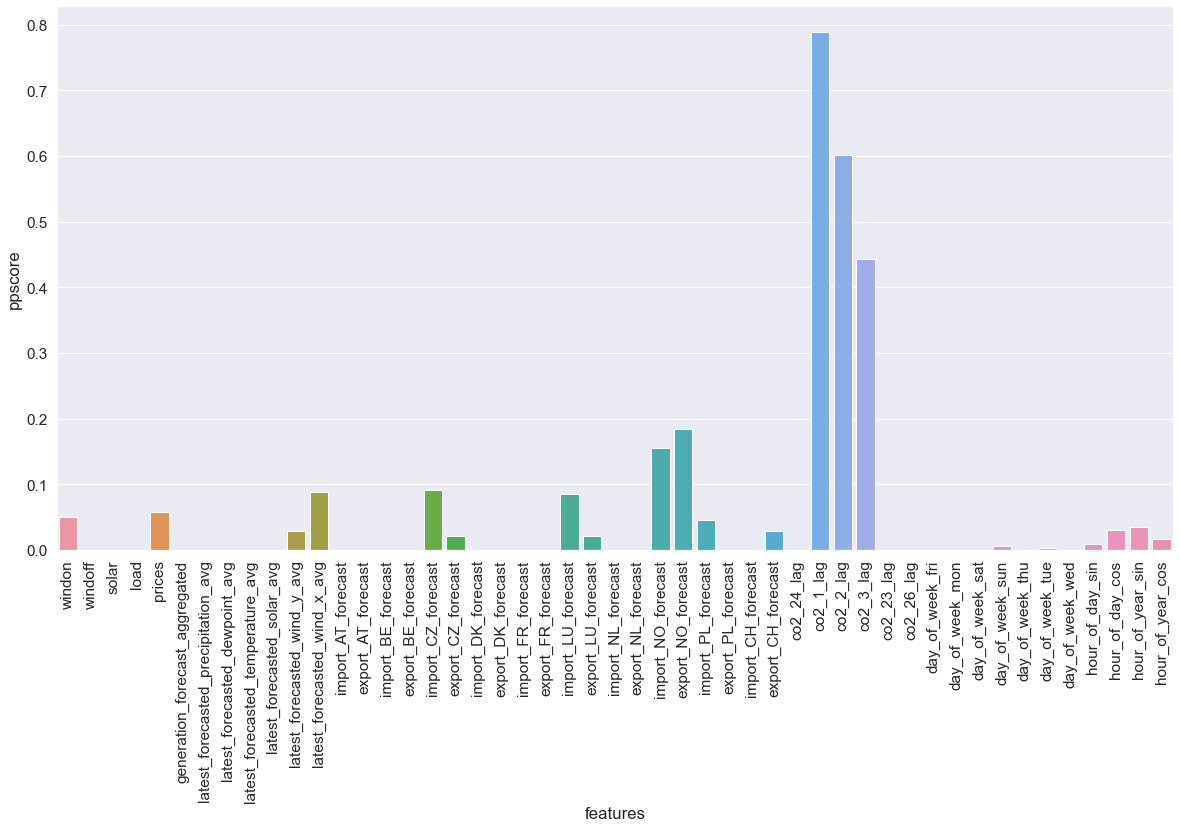

In [281]:
plt.figure(figsize = (20,10))
pps_emf_bar = sns.barplot(data = pps_emf, x = "x", y = "ppscore")
pps_emf_bar.set(xlabel='features')
for item in pps_emf_bar.get_xticklabels():
    item.set_rotation(90)
#pps_emf_bar?

In [95]:
data_emf = pps_emf['ppscore']
emf_pps_reduced = pd.DataFrame(data = data_emf) #columns = ['pps_score'])
emf_new = emf_pps_reduced.set_index(pps_emf['x'])

In [103]:
corr_factors_df['ppscore'] = emf_new.round(4)
corr_factors_df.head()

Pearson coefficient  Spearman coefficient  ppscore
windon               -0.6850               -0.6250   0.0495
windoff              -0.5085               -0.4988   0.0000
solar                -0.3864               -0.3164   0.0000
load                  0.0586                0.0395   0.0000
prices                0.5335                0.5655   0.0572

In [104]:
corr_factors_df.to_excel('corr.xlsx')

In [97]:
corr_factors_df.style.bar(align=0, cmap="bwr", height=50, width=50, props="width: 120px; border-right: 1px solid black;")#.highlight_between(subset = ['ppscore'], left = 0.04, right = 1.0, axis = 0 )

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [109]:
pps_features = pps.matrix(features, sorted = False)

In [112]:
pps_features.head()

x        y   ppscore            case  is_valid_score  \
0  windon   windon  1.000000  predict_itself            True   
1  windon  windoff  0.226672      regression            True   
2  windon    solar  0.000000      regression            True   
3  windon     load  0.000000      regression            True   
4  windon   prices  0.000000      regression            True   

                metric  baseline_score   model_score                    model  
0                 None        0.000000      1.000000                     None  
1  mean absolute error     1713.827550   1325.351075  DecisionTreeRegressor()  
2  mean absolute error     5280.985550   7288.976358  DecisionTreeRegressor()  
3  mean absolute error     7838.163900  10156.331742  DecisionTreeRegressor()  
4  mean absolute error       47.640854     65.640351  DecisionTreeRegressor()

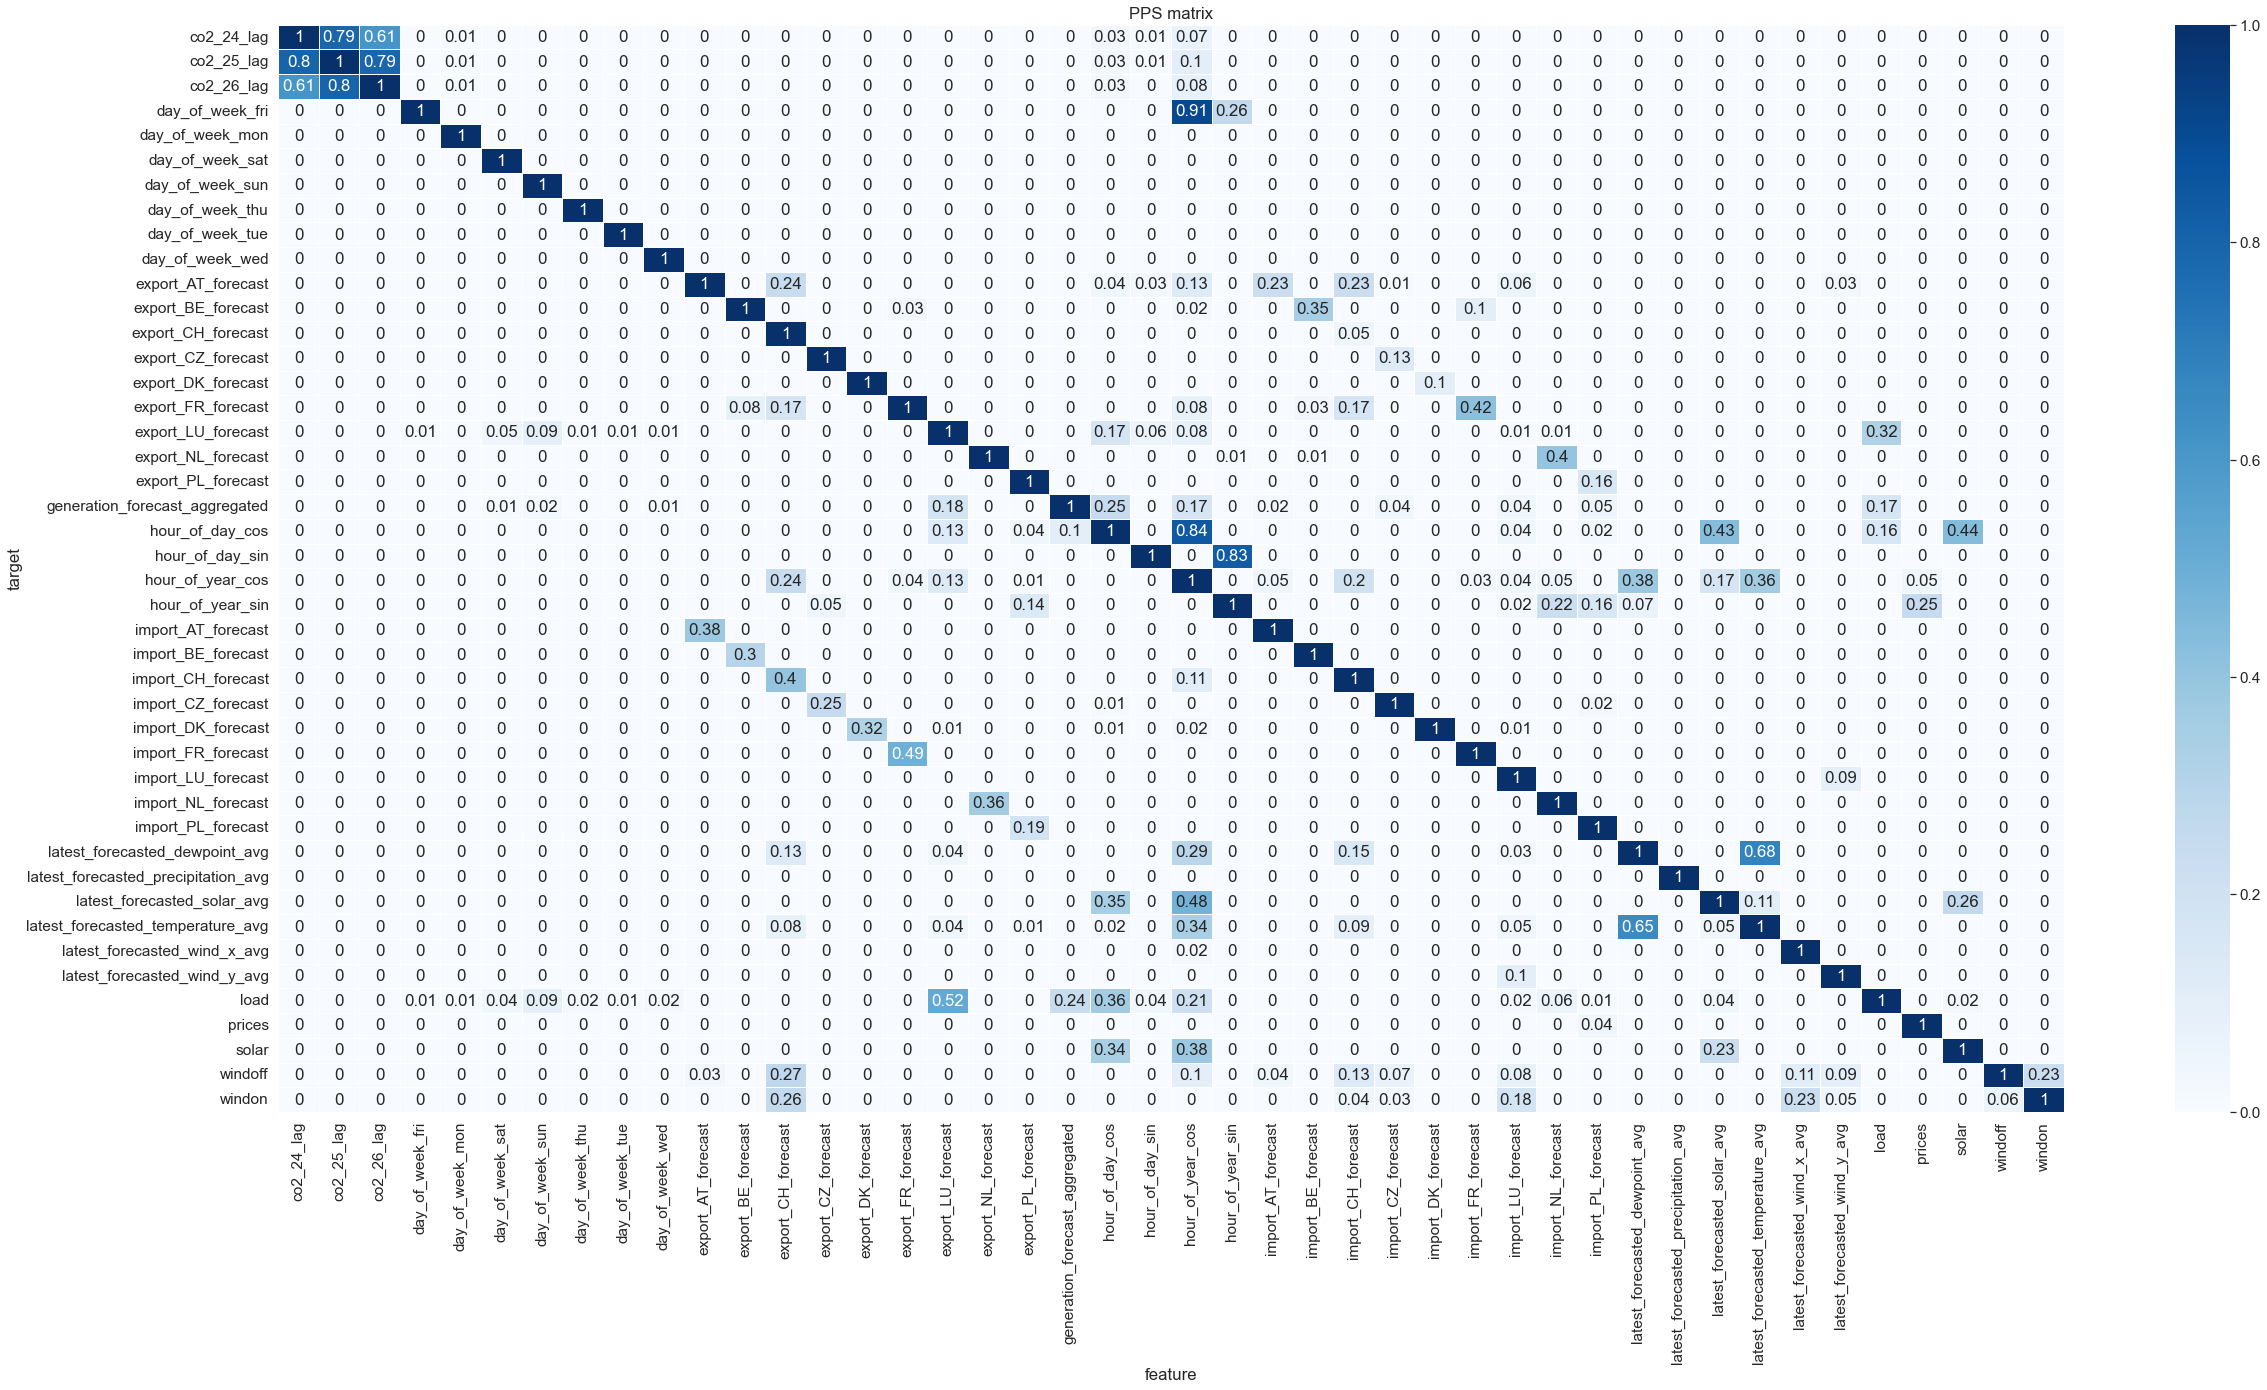

In [115]:
pps_features_rounded = pps_features.round(2)
pps_features_vis = pps_features_rounded.pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(40,20))
sns.set(font_scale = 1.4)
pps_features_heatmap = heatmap(pps_features_vis)
#pps_features_heatmap.set_xticklabels(pps_features_heatmap.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
plt.show()

In [288]:
pps_features_vis.head()

x           co2_1_lag  co2_23_lag  co2_24_lag  co2_26_lag  co2_2_lag  \
y                                                                      
co2_1_lag        1.00        0.00        0.00        0.00       0.79   
co2_23_lag       0.00        1.00        0.80        0.45       0.00   
co2_24_lag       0.00        0.80        1.00        0.61       0.00   
co2_26_lag       0.00        0.46        0.61        1.00       0.00   
co2_2_lag        0.79        0.00        0.00        0.00       1.00   

x           co2_3_lag  day_of_week_fri  day_of_week_mon  day_of_week_sat  \
y                                                                          
co2_1_lag        0.60              0.0             0.00              0.0   
co2_23_lag       0.00              0.0             0.01              0.0   
co2_24_lag       0.00              0.0             0.01              0.0   
co2_26_lag       0.00              0.0             0.01              0.0   
co2_2_lag        0.79              0.0             0.00              0.0   

x           day_of_week_sun  ...  latest_forecasted_precipitation_avg  \
y                            ...                                        
co2_1_lag              0.01  ...                                  0.0   
co2_23_lag             0.00  ...                                  0.0   
co2_24_lag             0.00  ...                                  0.0   
co2_26_lag             0.00  ...                                  0.0   
co2_2_lag              0.01  ...                                  0.0   

x           latest_forecasted_solar_avg  latest_forecasted_temperature_avg  \
y                                                                            
co2_1_lag                           0.0                                0.0   
co2_23_lag                          0.0                                0.0   
co2_24_lag                          0.0                                0.0   
co2_26_lag                          0.0                                0.0   
co2_2_lag                           0.0                                0.0   

x           latest_forecasted_wind_x_avg  latest_forecasted_wind_y_avg  load  \
y                                                                              
co2_1_lag                           0.10                          0.03   0.0   
co2_23_lag                          0.00                          0.00   0.0   
co2_24_lag                          0.00                          0.00   0.0   
co2_26_lag                          0.00                          0.00   0.0   
co2_2_lag                           0.11                          0.02   0.0   

x           prices  solar  windoff  windon  
y                                           
co2_1_lag     0.05    0.0      0.0    0.05  
co2_23_lag    0.00    0.0      0.0    0.00  
co2_24_lag    0.00    0.0      0.0    0.00  
co2_26_lag    0.00    0.0      0.0    0.00  
co2_2_lag     0.03    0.0      0.0    0.03  

[5 rows x 49 columns]

In [121]:
threshold = 0.79
pps_features = get_corr(pps_features_vis, threshold, method = 'pps')
#pps_features.style.highlight_between(left = 0.8, right = 1.0, axis = 0 )
pps_features.head()

C:\Users\ABajrami\AppData\Local\Temp/ipykernel_20572/987904165.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, data in  df.iteritems():


pps
(co2_24_lag, co2_24_lag)             1.00
(co2_24_lag, co2_25_lag)             0.80
(hour_of_year_cos, day_of_week_fri)  0.91
(hour_of_year_cos, hour_of_day_cos)  0.84
(hour_of_year_sin, hour_of_day_sin)  0.83

In [122]:
corr_spearman['pearson'] =  corr_pearson
corr_spearman['pps'] = pps_features
features_comb = corr_spearman
features_comb

spearman_corr  pearson  \
(windon, windon)                                             1.00     1.00   
(solar, latest_forecasted_solar_avg)                         0.81      NaN   
(solar, hour_of_day_cos)                                    -0.81      NaN   
(load, export_LU_forecast)                                   0.86     0.85   
(latest_forecasted_dewpoint_avg, latest_forecas...           0.95     0.95   
(import_FR_forecast, export_FR_forecast)                    -0.83      NaN   
(co2_24_lag, co2_25_lag)                                     0.98     0.99   

                                                    pps  
(windon, windon)                                    NaN  
(solar, latest_forecasted_solar_avg)                NaN  
(solar, hour_of_day_cos)                            NaN  
(load, export_LU_forecast)                          NaN  
(latest_forecasted_dewpoint_avg, latest_forecas...  NaN  
(import_FR_forecast, export_FR_forecast)            NaN  
(co2_24_lag, co2_25_lag)                            0.8